# Projet Diabétique

In [113]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('Diabetic.csv')

In [115]:
print('The shape of the Dataset is :', df.shape, 'with', df.shape[0], 'records and', df.shape[1], 'columns')
df.head()

The shape of the Dataset is : (101766, 1) with 101766 records and 1 columns


,encounter_id;patient_nbr;race;gender;age;weight;admission_type_id;discharge_disposition_id;admission_source_id;time_in_hospital;payer_code;medical_specialty;num_lab_procedures;num_procedures;num_medications;number_outpatient;number_emergency;number_inpatient;diag_1;diag_2;diag_3;number_diagnoses;max_glu_serum;A1Cresult;metformin;repaglinide;nateglinide;chlorpropamide;glimepiride;acetohexamide;glipizide;glyburide;tolbutamide;pioglitazone;rosiglitazone;acarbose;miglitol;troglitazone;tolazamide;examide;citoglipton;insulin;glyburide-metformin;glipizide-metformin;glimepiride-pioglitazone;metformin-rosiglitazone;metformin-pioglitazone;change;diabetesMed;readmitted
0,2278392;8222157;Caucasian;Female;[0-10);?;6;25...
1,149190;55629189;Caucasian;Female;[10-20);?;1;1...
2,64410;86047875;AfricanAmerican;Female;[20-30);...
3,500364;82442376;Caucasian;Male;[30-40);?;1;1;7...
4,16680;42519267;Caucasian;Male;[40-50);?;1;1;7;...


In [116]:

# Split the single column into multiple columns using semicolon as the delimiter
df = df['encounter_id;patient_nbr;race;gender;age;weight;admission_type_id;discharge_disposition_id;admission_source_id;time_in_hospital;payer_code;medical_specialty;num_lab_procedures;num_procedures;num_medications;number_outpatient;number_emergency;number_inpatient;diag_1;diag_2;diag_3;number_diagnoses;max_glu_serum;A1Cresult;metformin;repaglinide;nateglinide;chlorpropamide;glimepiride;acetohexamide;glipizide;glyburide;tolbutamide;pioglitazone;rosiglitazone;acarbose;miglitol;troglitazone;tolazamide;examide;citoglipton;insulin;glyburide-metformin;glipizide-metformin;glimepiride-pioglitazone;metformin-rosiglitazone;metformin-pioglitazone;change;diabetesMed;readmitted'].str.split(';', expand=True)

# Rename the columns
df.columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

# Print the shape of the updated DataFrame
print('The shape of the updated DataFrame is:', df.shape)

The shape of the updated DataFrame is: (101766, 50)


In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [118]:
#nombre de colonnes
print('There are total', len(df.columns), 'columns in the dataset.')

There are total 50 columns in the dataset.


In [117]:
#transposer les résultats pour une meilleure lisibilité.
#count : Le nombre de valeurs non manquantes dans la colonne.
#unique : Le nombre de valeurs distinctes dans la colonne.
#top : La valeur la plus fréquente dans la colonne.
#freq : Le nombre de fois que la valeur la plus fréquente apparaît dans la colonne.
df.describe(include = 'all').T

,count,unique,top,freq
encounter_id,101766,101663,,104
patient_nbr,101766,71451,,118
race,101766,7,Caucasian,76022
gender,101766,4,Female,54650
age,101766,11,[70-80),26050
weight,101766,11,?,98451
admission_type_id,101766,9,1,53937
discharge_disposition_id,101766,27,1,60185
admission_source_id,101766,18,7,57450
time_in_hospital,101766,15,3,17746


In [119]:
#looking for null values
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 2272
gender 0
age 0
weight 98451
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40215
medical_specialty 49909
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 356
diag_3 1422
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [122]:
print('There are', len(df['patient_nbr'].unique()), 'unique patients in the data.')
print('There are', len(df['encounter_id'].unique()), 'unique encounters in the data.')
#Everytime the patient visits the hospital, it is called as encounter.
#So we have multiple encounters per patient.

There are 71451 unique patients in the data.
There are 101663 unique encounters in the data.


# Analyse des données

In [123]:
# If we divide total patient with total encounter, we can get the average encounters per patient.
len(df['encounter_id'].unique())/len(df['patient_nbr'].unique())

1.4228352297378624

In [124]:
df['readmitted'].value_counts()

readmitted
NO     54810
>30    35507
<30    11342
         107
Name: count, dtype: int64

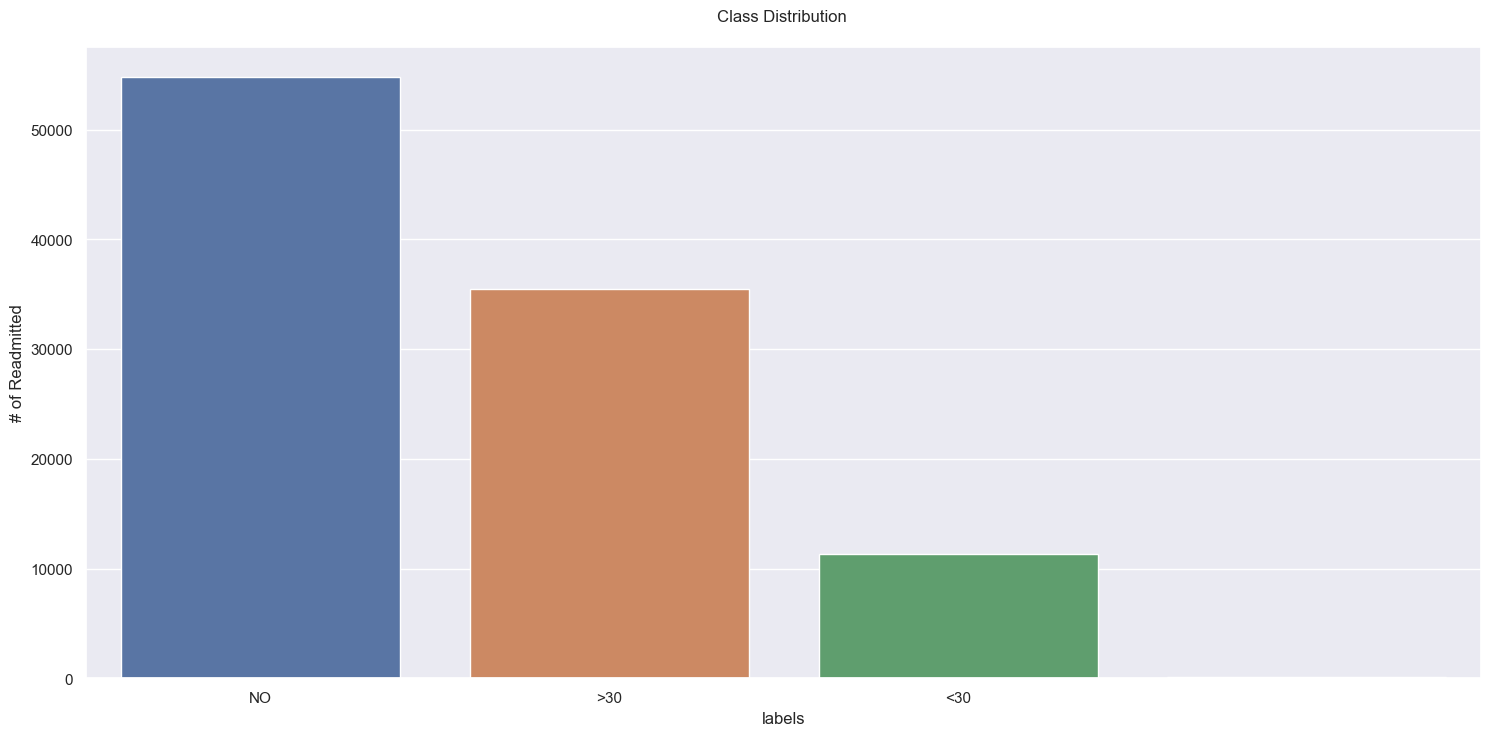

In [125]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

In [126]:
df['readmitted'].unique()

array(['NO', '>30', '<30', ''], dtype=object)

In [129]:
#fusionner les moins 30 et plus 30
def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label)
#applique la fonction check_label() à chaque valeur de la colonne 'readmitted' 

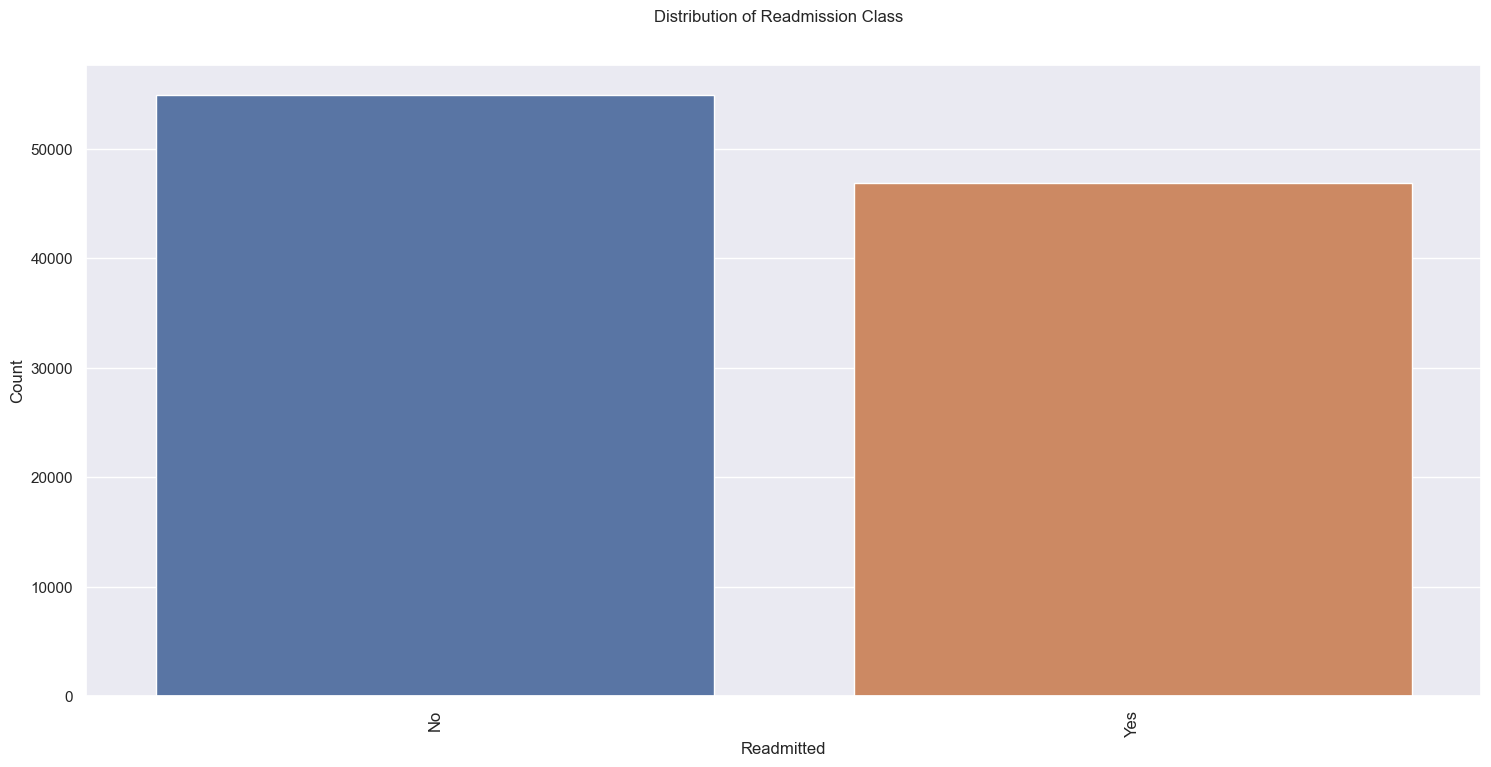

In [130]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()
#Cela crée un diagramme à barres à l'aide de la bibliothèque Seaborn (importée sous le nom de 'sns'). 
#L'axe x représente la colonne 'readmitted_2', et les données proviennent du DataFrame 'df'.

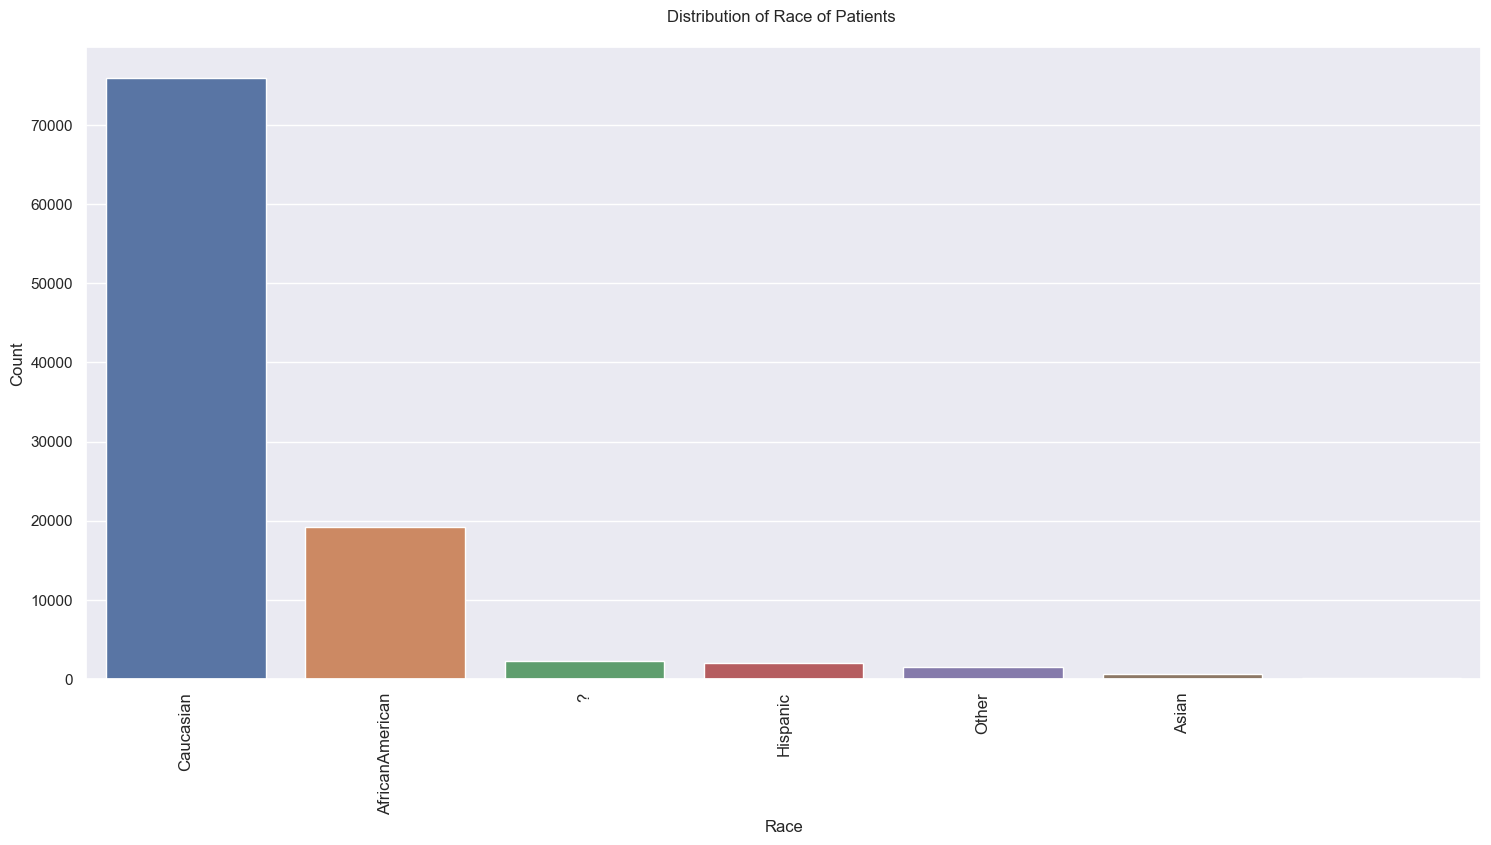

In [131]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

In [132]:
#je rajoute les  valeurs ? à other
df.loc[df['race'] == '?', 'race'] = 'Other'

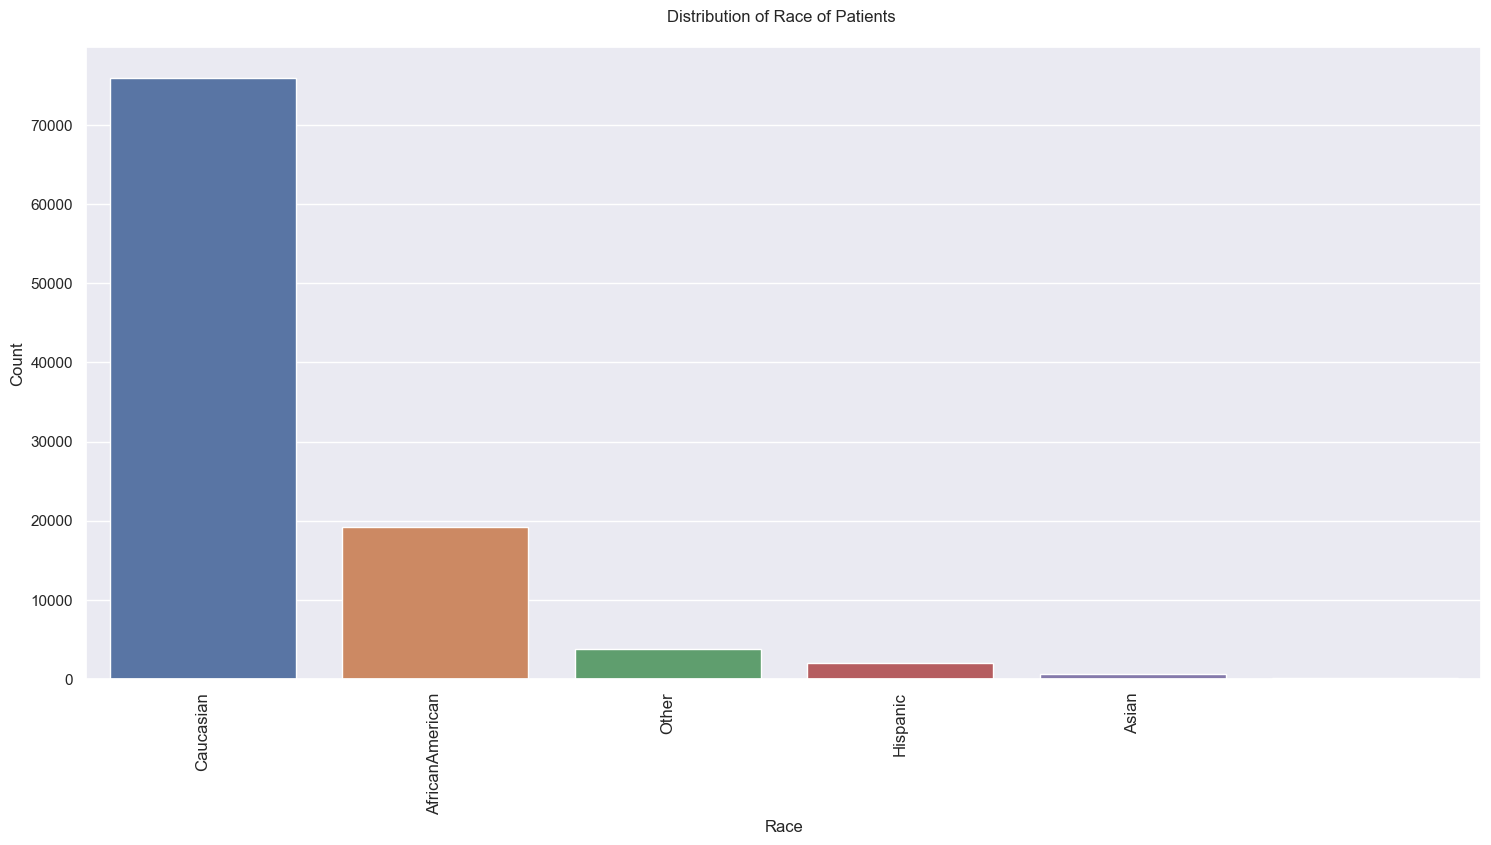

In [133]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

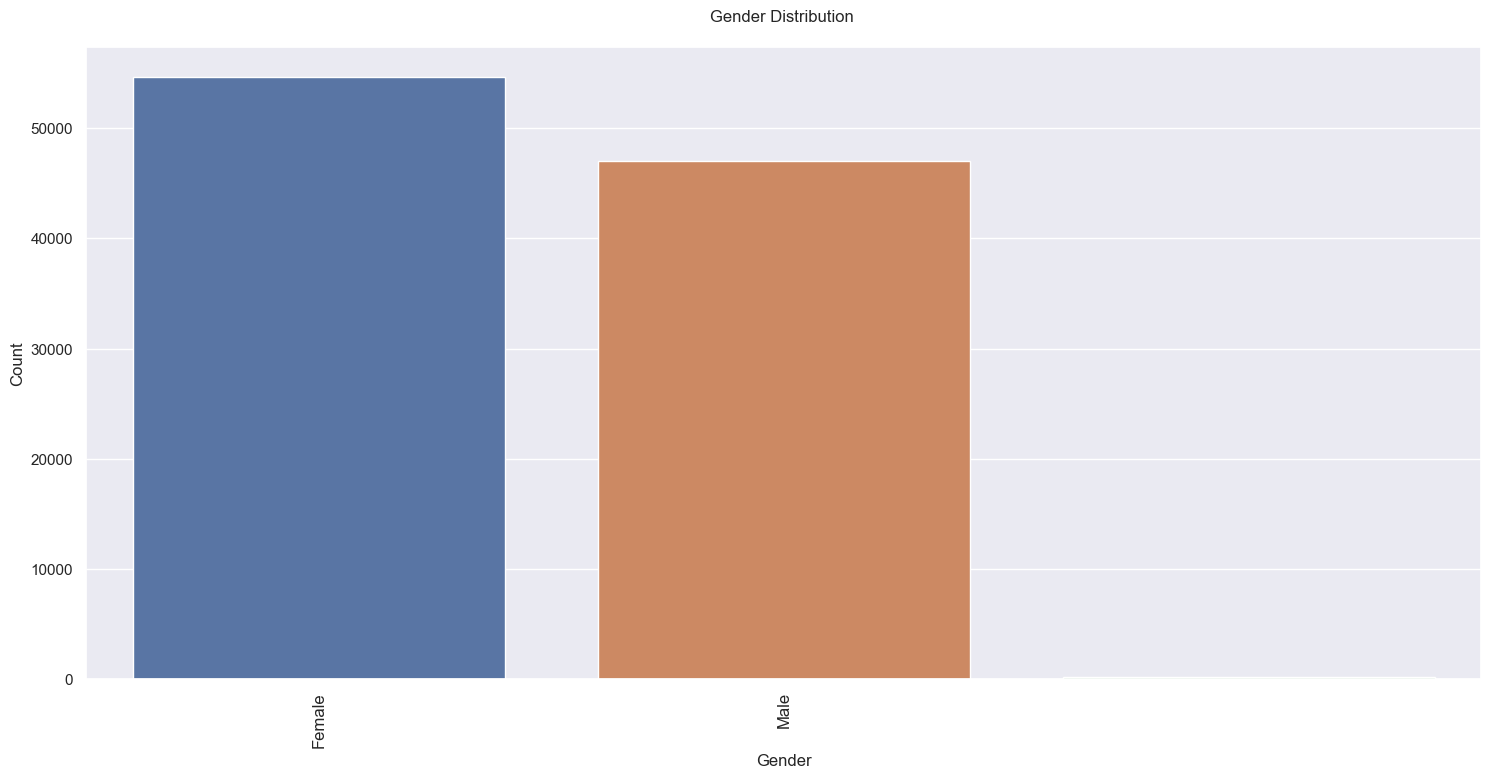

In [146]:
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

In [147]:
df['gender'].value_counts()


gender
Female    54650
Male      47009
            104
Name: count, dtype: int64

In [148]:
# Drop the "Unknown/Invalid" gender of the data.
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)
df.reset_index(inplace = True, drop = True)

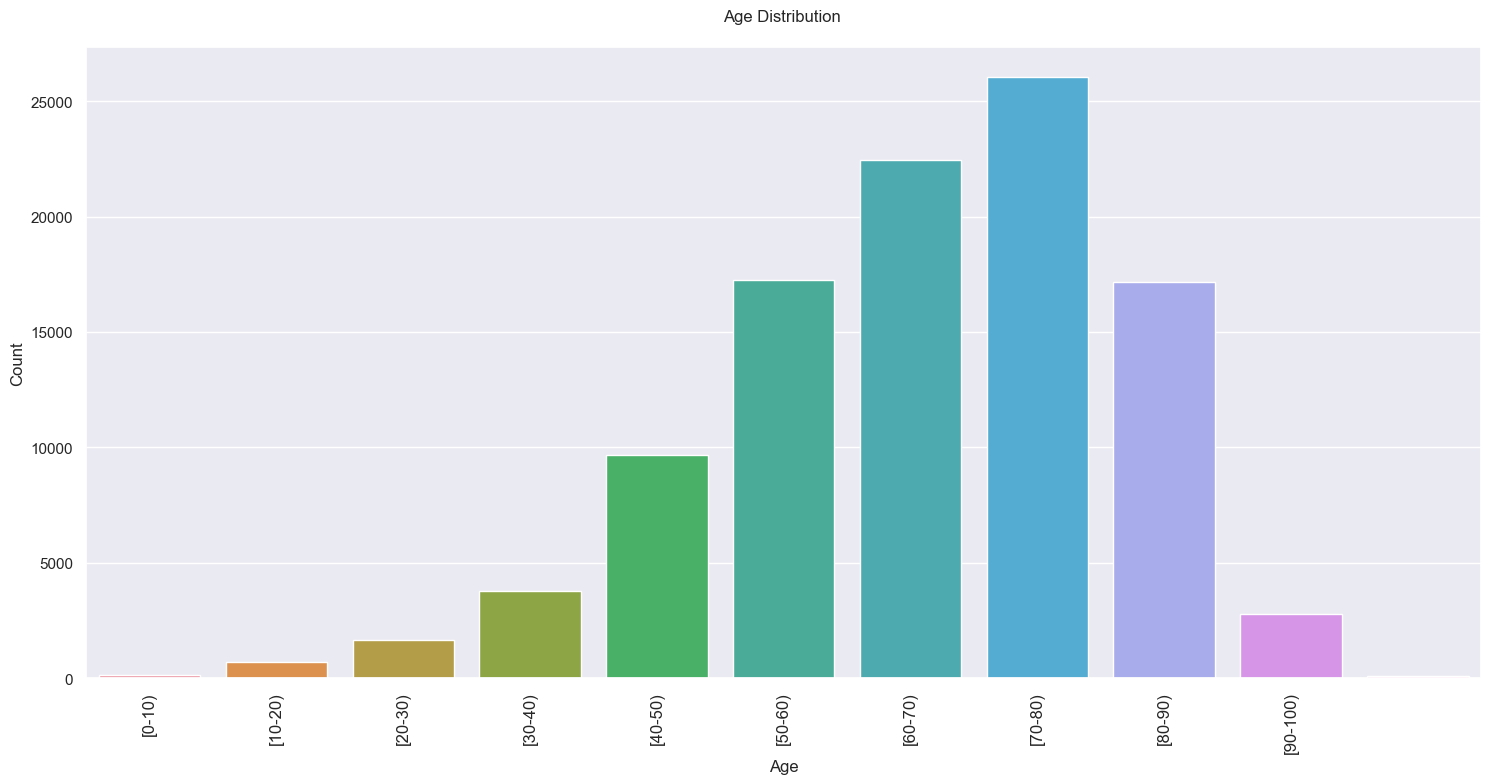

In [149]:
#la distribution de l'age
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

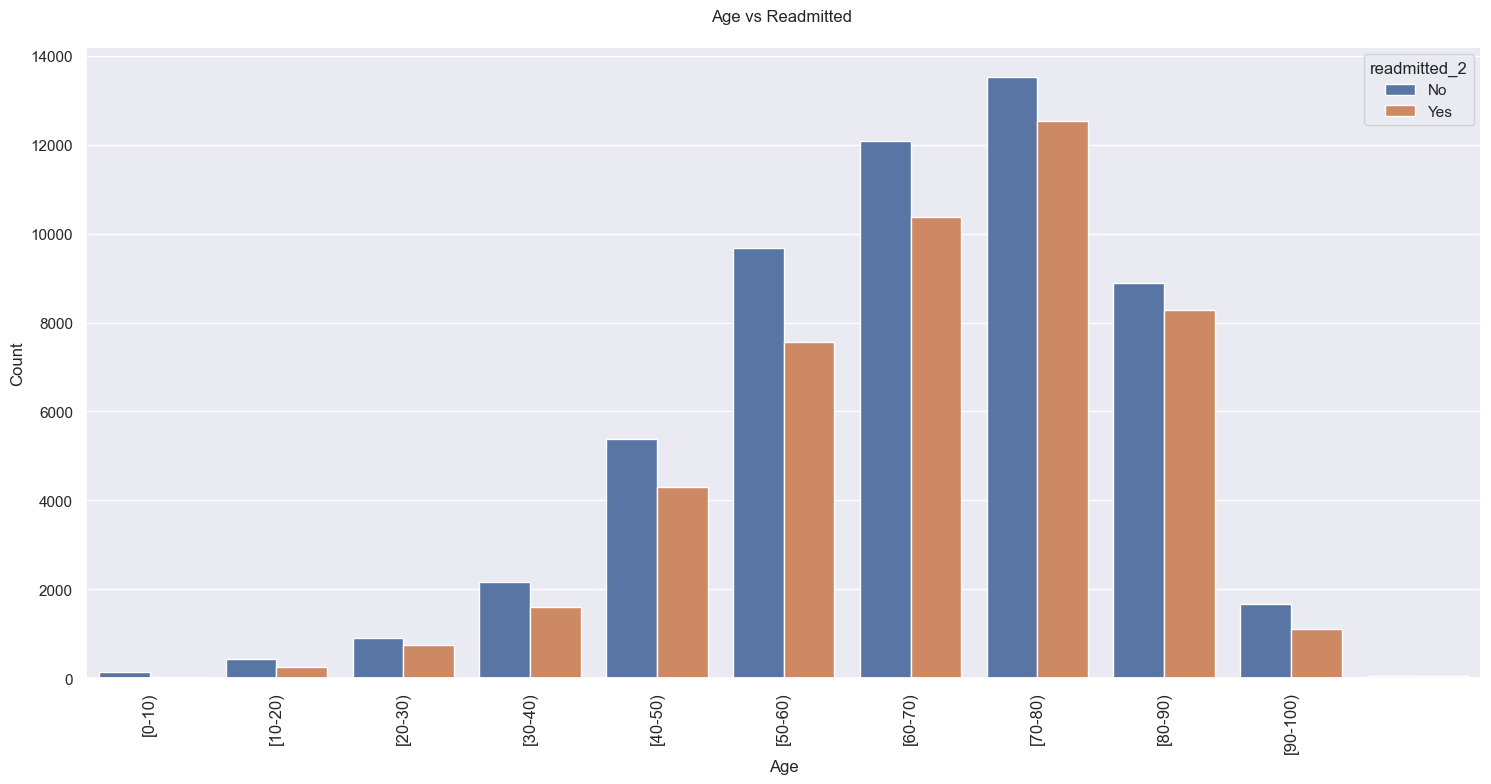

In [139]:
ax = sns.countplot(x="age", hue="readmitted_2", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()

In [150]:
ax = sns.countplot(x="weight", hue="readmitted_2", data=df)
plt.xlabel('Weight', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Weight vs Readmitted \n', size = 12)
plt.show()

ValueError: Could not interpret input 'weight'

In [151]:
# Lets drop this column. 
df.drop(columns = ['weight'], inplace = True)

KeyError: "['weight'] not found in axis"

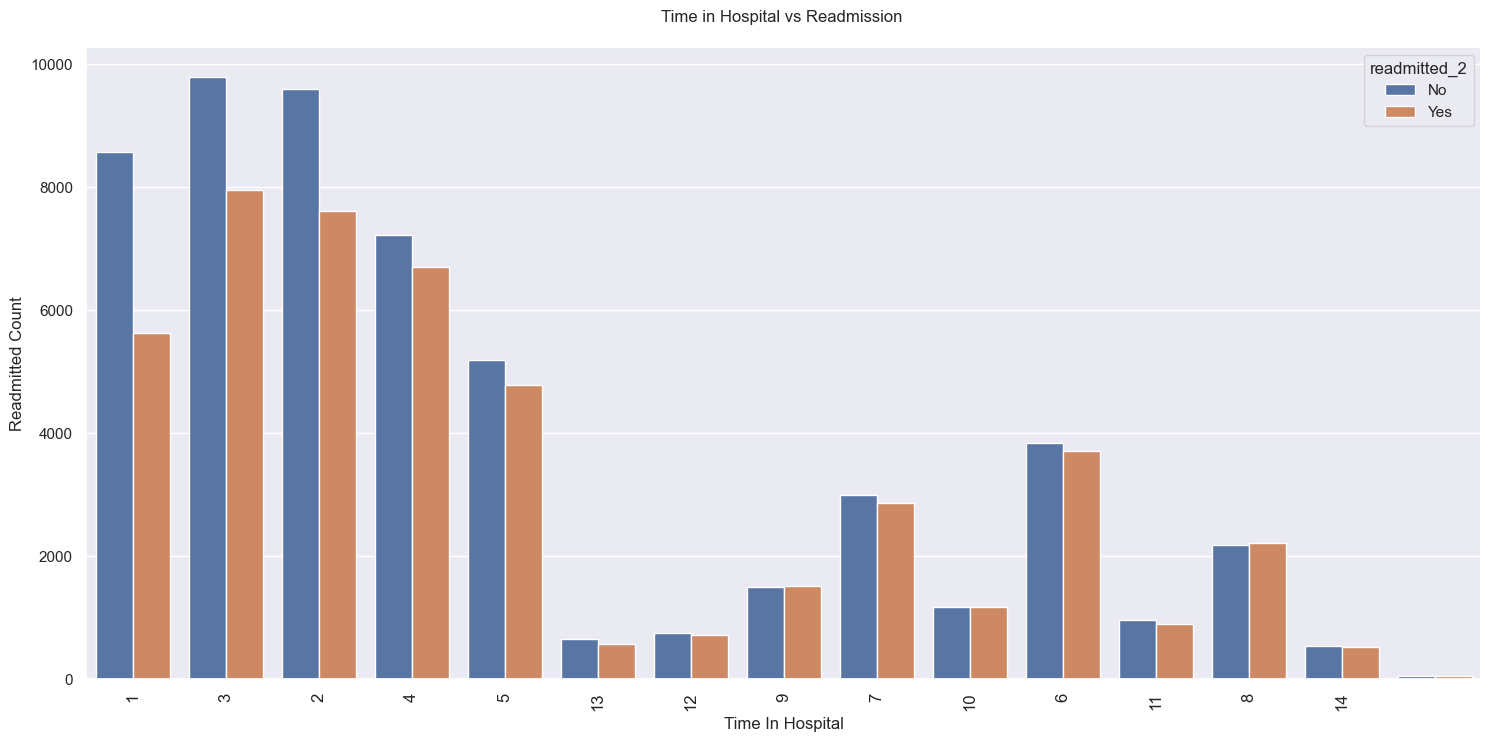

In [152]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted_2',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission \n', size = 12)
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


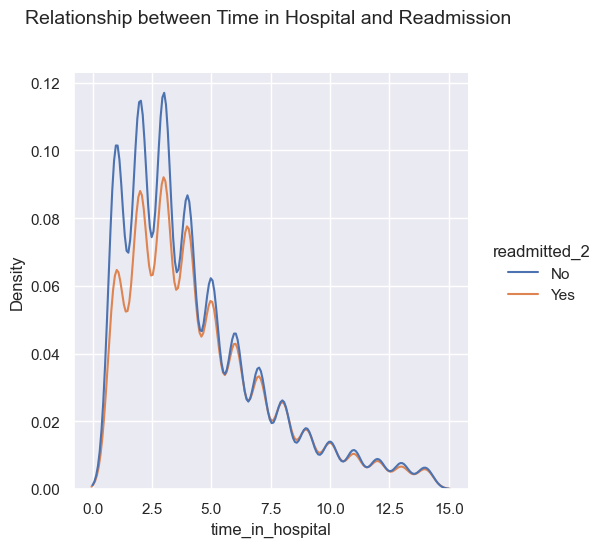

In [153]:
df['time_in_hospital'] = pd.to_numeric(df['time_in_hospital'], errors='coerce')

sns.set(rc={'figure.figsize':(18, 8.2)})
sns.displot(df, x="time_in_hospital", hue='readmitted_2', kind="kde")
plt.title('Relationship between Time in Hospital and Readmission \n\n', size=14)
plt.show()

In [155]:
#suppression de la colonne payer code
df.drop(columns = ['payer_code'], inplace = True)

KeyError: "['payer_code'] not found in axis"

In [156]:
#suppression des spécialités car bcp de choix 84 distinct values,et des valeurs manquantes
df.drop(columns =['medical_specialty'], inplace = True) 

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


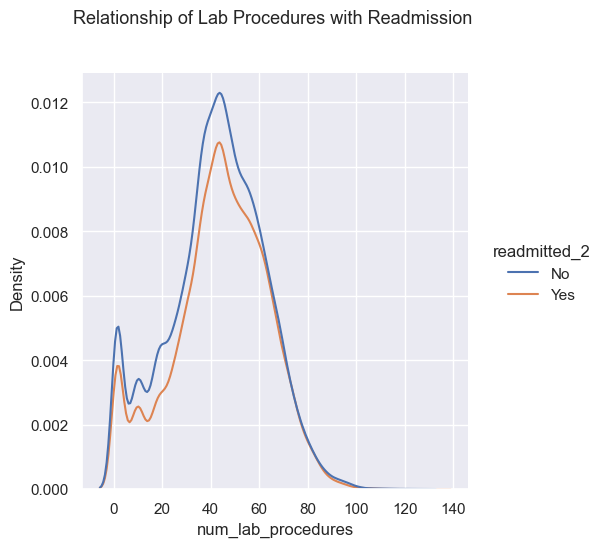

In [157]:
#lab procedures test during encounter
df['num_lab_procedures'] = pd.to_numeric(df['num_lab_procedures'], errors='coerce')

sns.displot(df, x="num_lab_procedures", hue='readmitted_2', kind="kde")
plt.title('Relationship of Lab Procedures with Readmission \n\n', size=13)
plt.show()

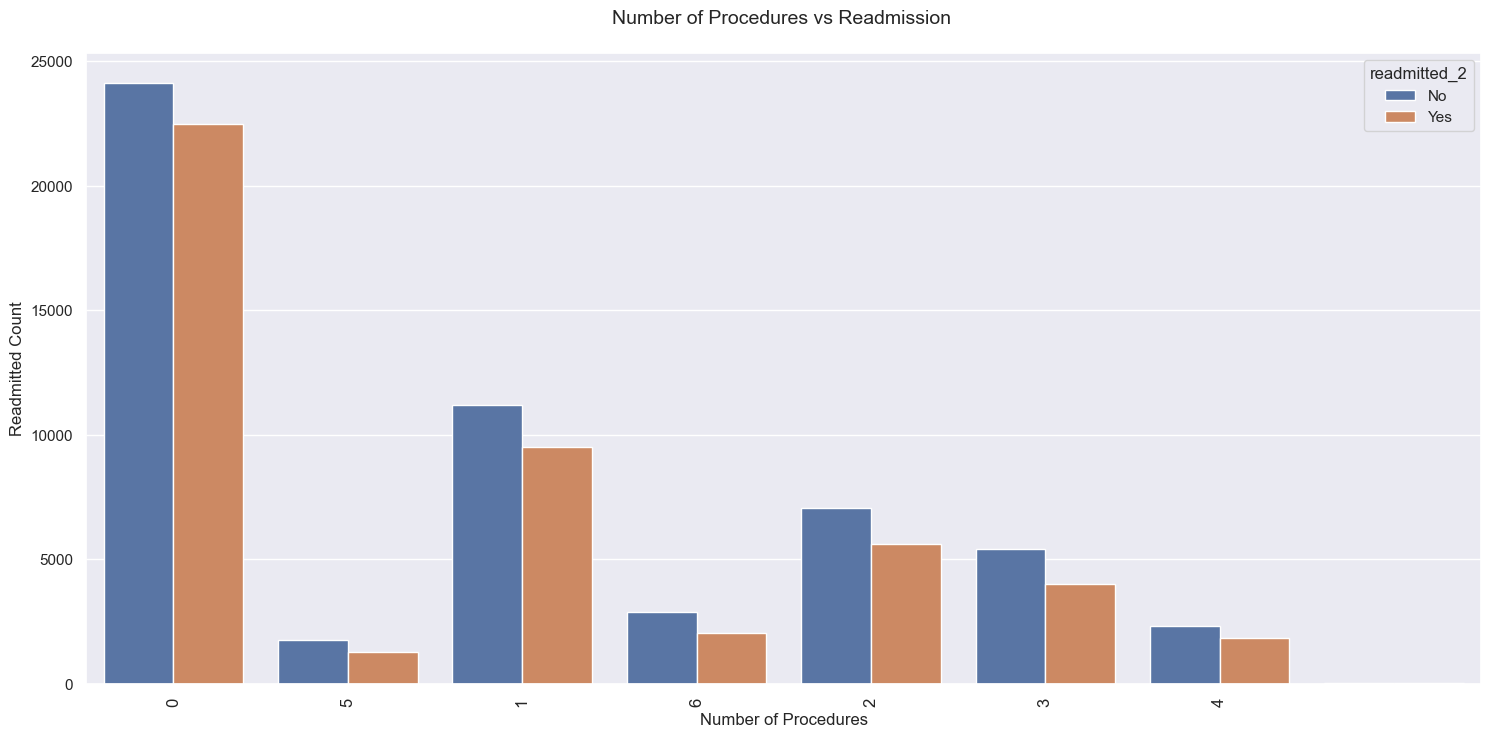

In [158]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='num_procedures',  hue= 'readmitted_2',  data= df)
plt.xlabel('Number of Procedures', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Number of Procedures vs Readmission \n', size = 14)
plt.show()


C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


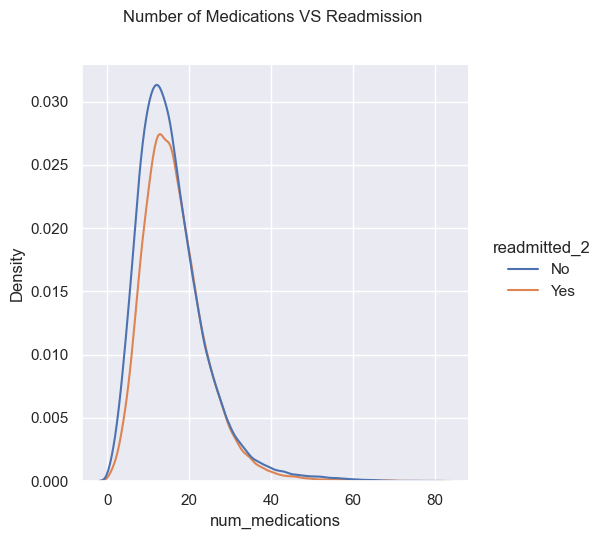

In [159]:
df['num_medications'] = pd.to_numeric(df['num_medications'], errors='coerce')

sns.displot(df, x="num_medications", hue='readmitted_2', kind="kde")
plt.title('Number of Medications VS Readmission \n\n')
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


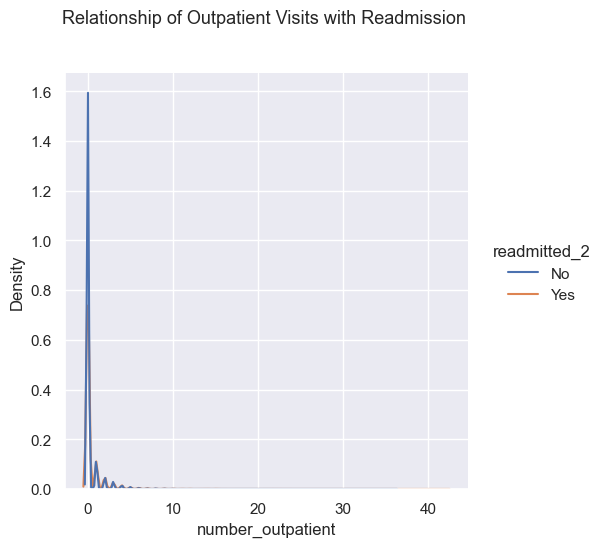

In [160]:
df['number_outpatient'] = pd.to_numeric(df['number_outpatient'], errors='coerce')

sns.displot(df, x="number_outpatient", hue='readmitted_2', kind='kde')
plt.title('Relationship of Outpatient Visits with Readmission \n\n', size=13)
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


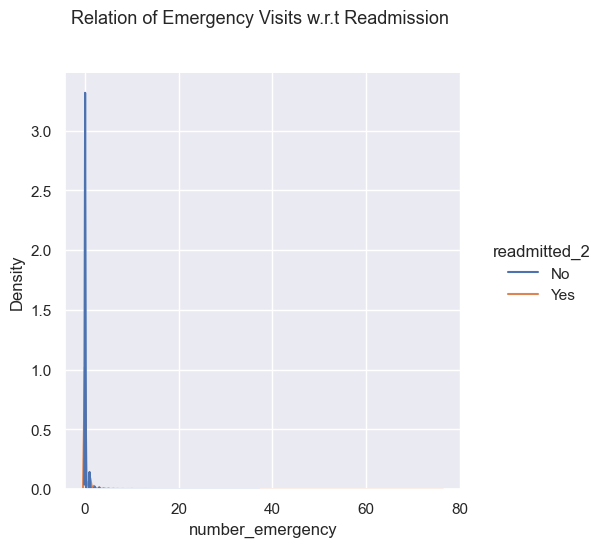

In [162]:
df['number_emergency'] = pd.to_numeric(df['number_emergency'], errors='coerce')

sns.displot(df, x="number_emergency", hue='readmitted_2', kind='kde')
plt.title('Relation of Emergency Visits w.r.t Readmission \n\n', size=13)
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


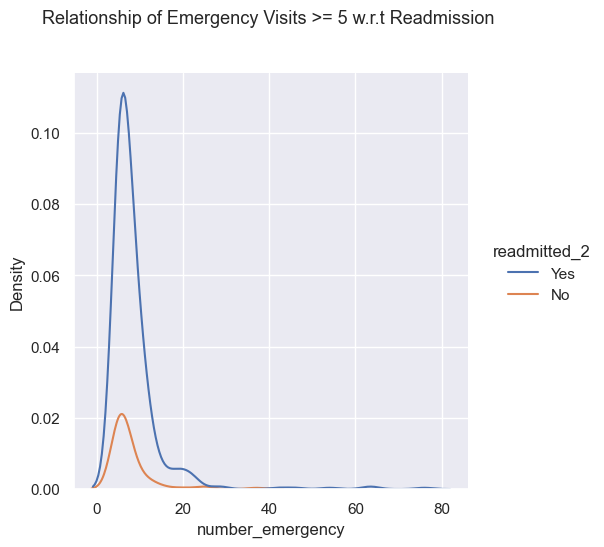

In [163]:
df['number_emergency'] = pd.to_numeric(df['number_emergency'], errors='coerce')

sns.displot(df.loc[df['number_emergency'] >= 5], x="number_emergency", hue='readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits >= 5 w.r.t Readmission \n\n', size=13)
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


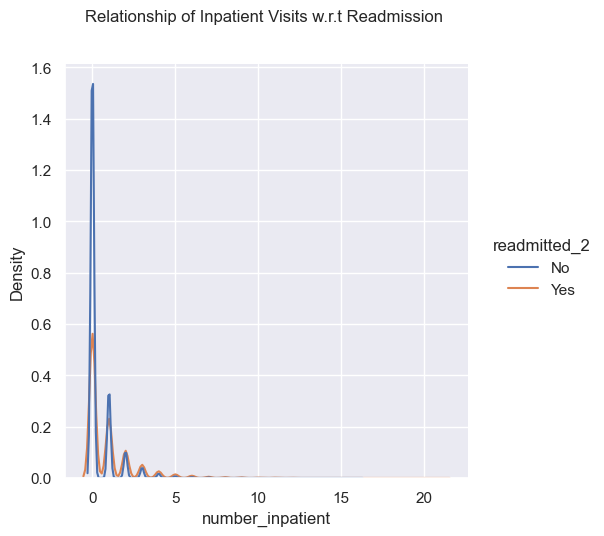

In [164]:
df['number_inpatient'] = pd.to_numeric(df['number_inpatient'], errors='coerce')

sns.displot(df, x="number_inpatient", hue='readmitted_2', kind='kde')
plt.title('Relationship of Inpatient Visits w.r.t Readmission \n\n')
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


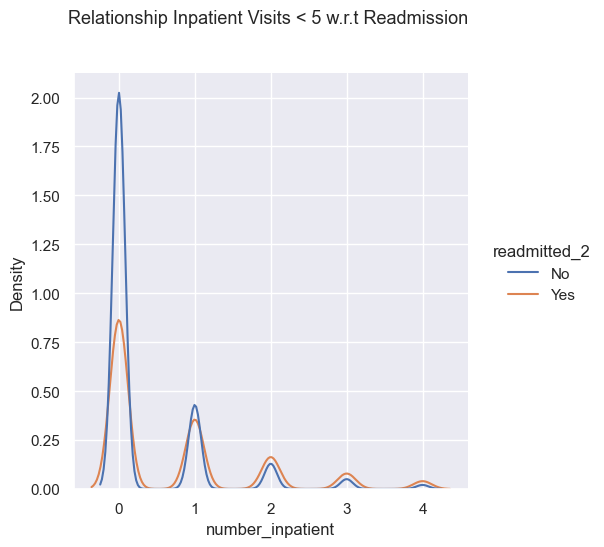

In [165]:
df['number_inpatient'] = pd.to_numeric(df['number_inpatient'], errors='coerce')

sns.displot(df.loc[df['number_inpatient'] < 5], x="number_inpatient", hue='readmitted_2', kind='kde')
plt.title('Relationship Inpatient Visits < 5 w.r.t Readmission \n\n', size=13)
plt.show()

From above graph, we see that if the patient comes in Inpatient Facility from 0-5 Times it will not readmitted.

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


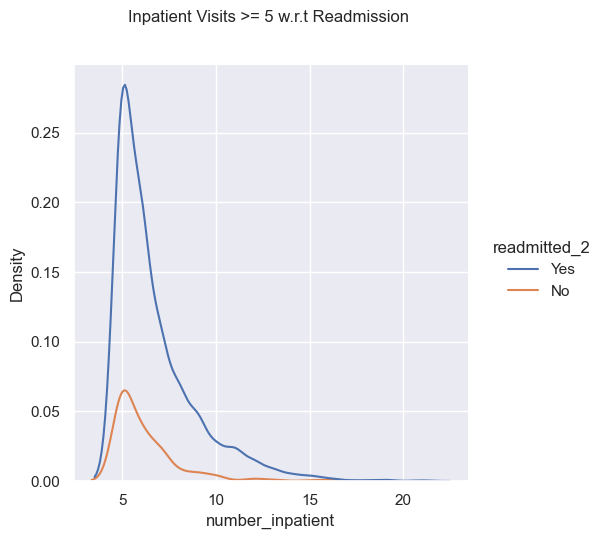

In [166]:
df['number_inpatient'] = pd.to_numeric(df['number_inpatient'], errors='coerce')

sns.displot(df.loc[df['number_inpatient'] >= 5], x="number_inpatient", hue='readmitted_2', kind='kde')
plt.title('Inpatient Visits >= 5 w.r.t Readmission \n\n')
plt.show()

In [167]:
len(df['diag_1'].unique()), len(df['diag_2'].unique()), len(df['diag_3'].unique())

(718, 750, 791)

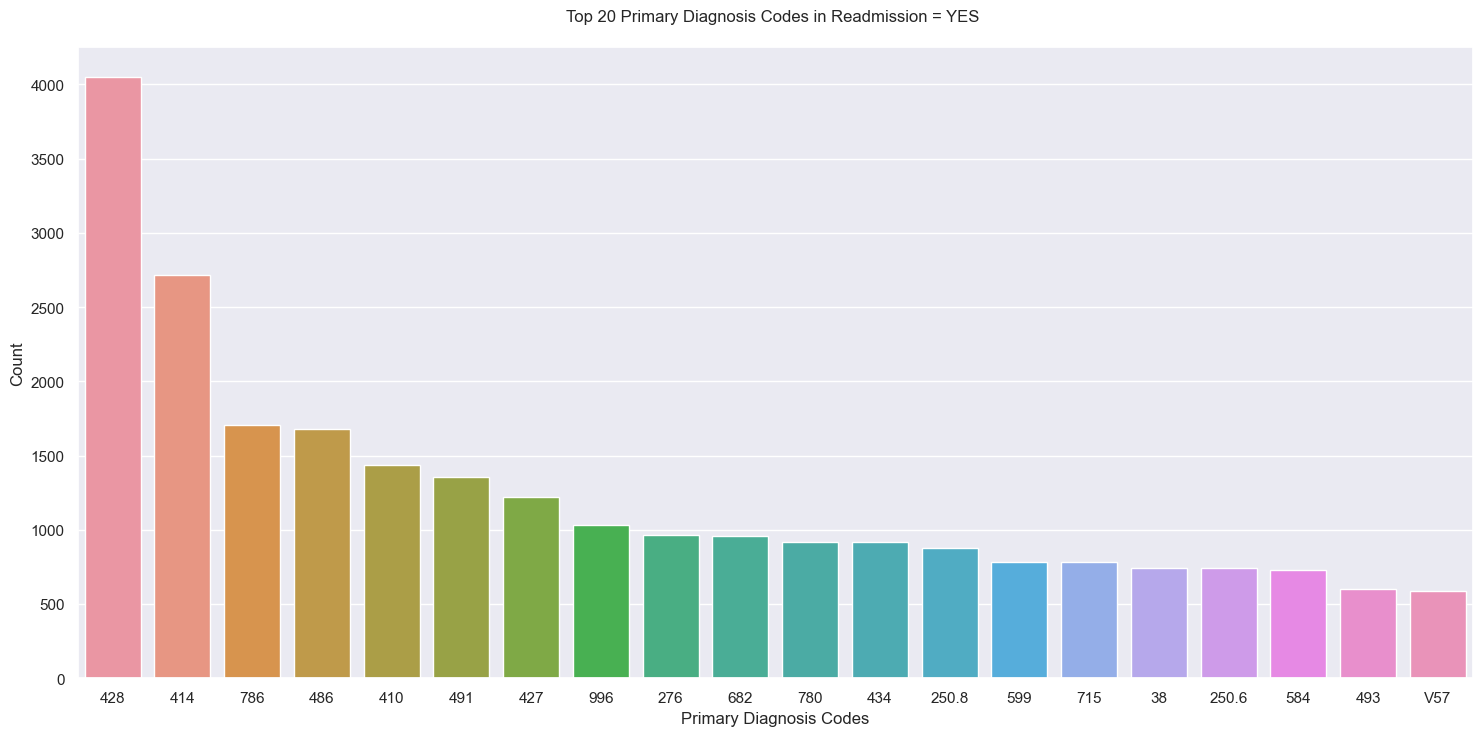

In [168]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = YES \n', size = 12)
plt.show()

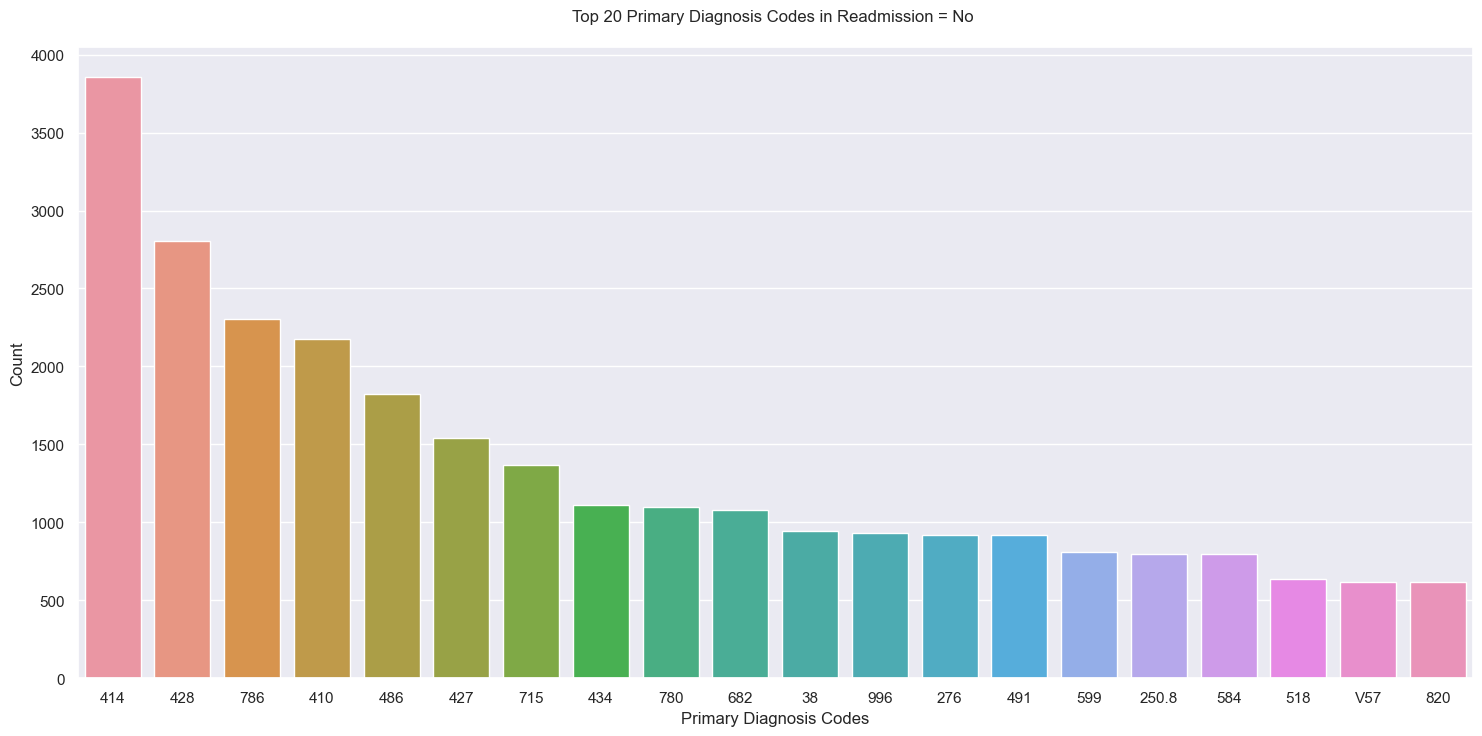

In [169]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'No']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'No']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = No \n', size = 12)
plt.show()

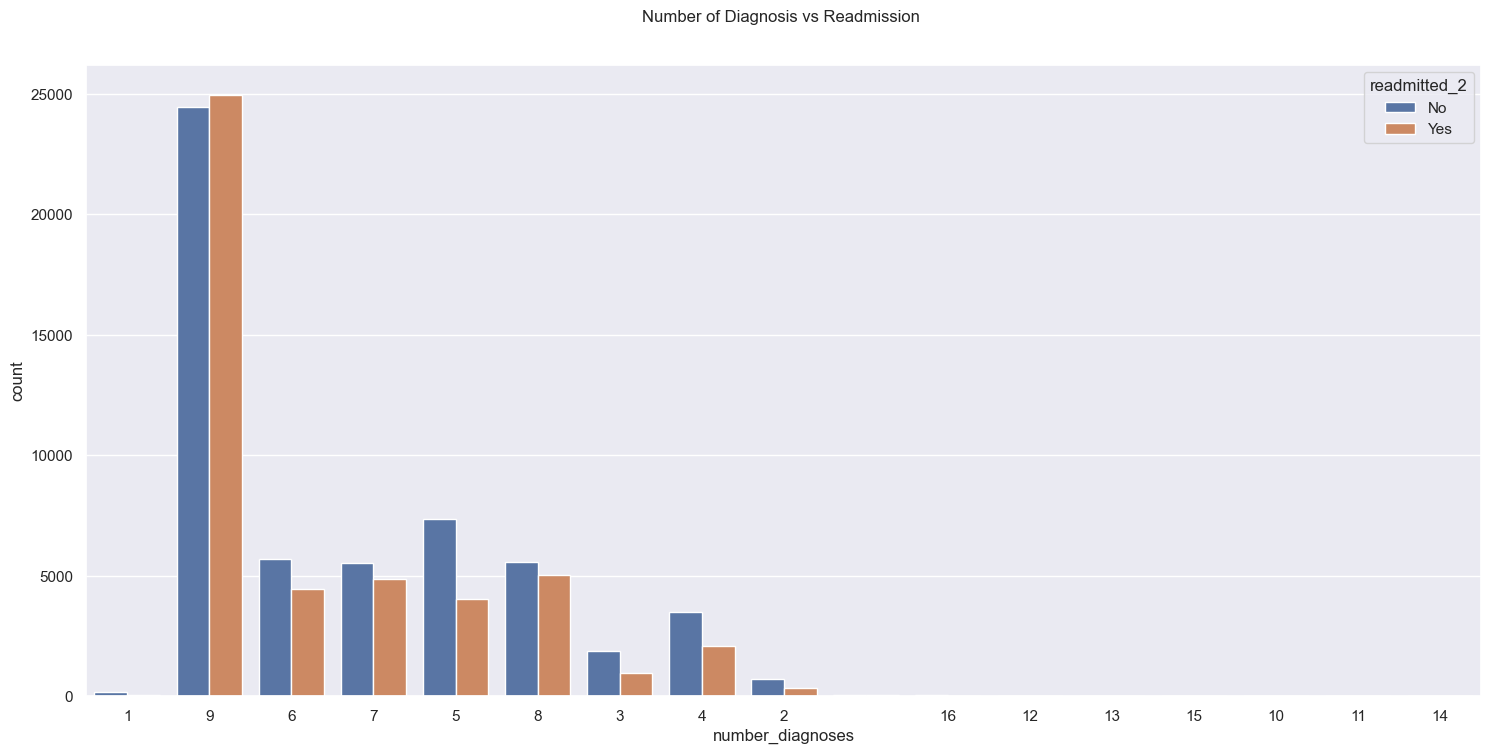

In [170]:
sns.countplot(data=df, x="number_diagnoses", hue='readmitted_2')
plt.title('Number of Diagnosis vs Readmission \n\n')
plt.show()

C:\Users\fatma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


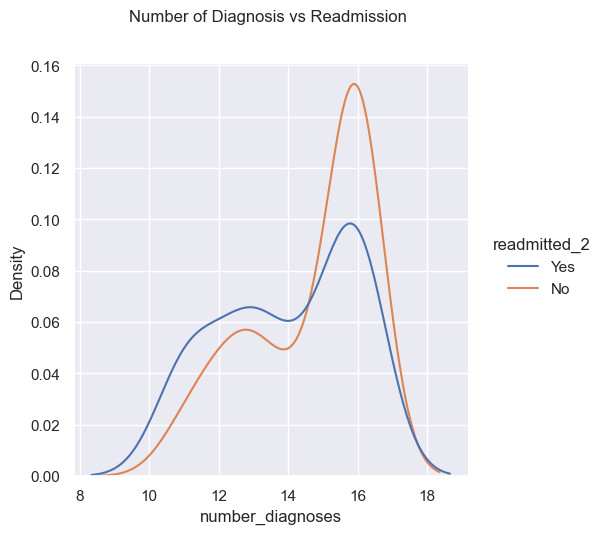

In [171]:
df['number_diagnoses'] = pd.to_numeric(df['number_diagnoses'], errors='coerce')

sns.displot(df[df['number_diagnoses'] > 10], x="number_diagnoses", hue='readmitted_2', kind='kde')
plt.title('Number of Diagnosis vs Readmission \n\n')
plt.show()

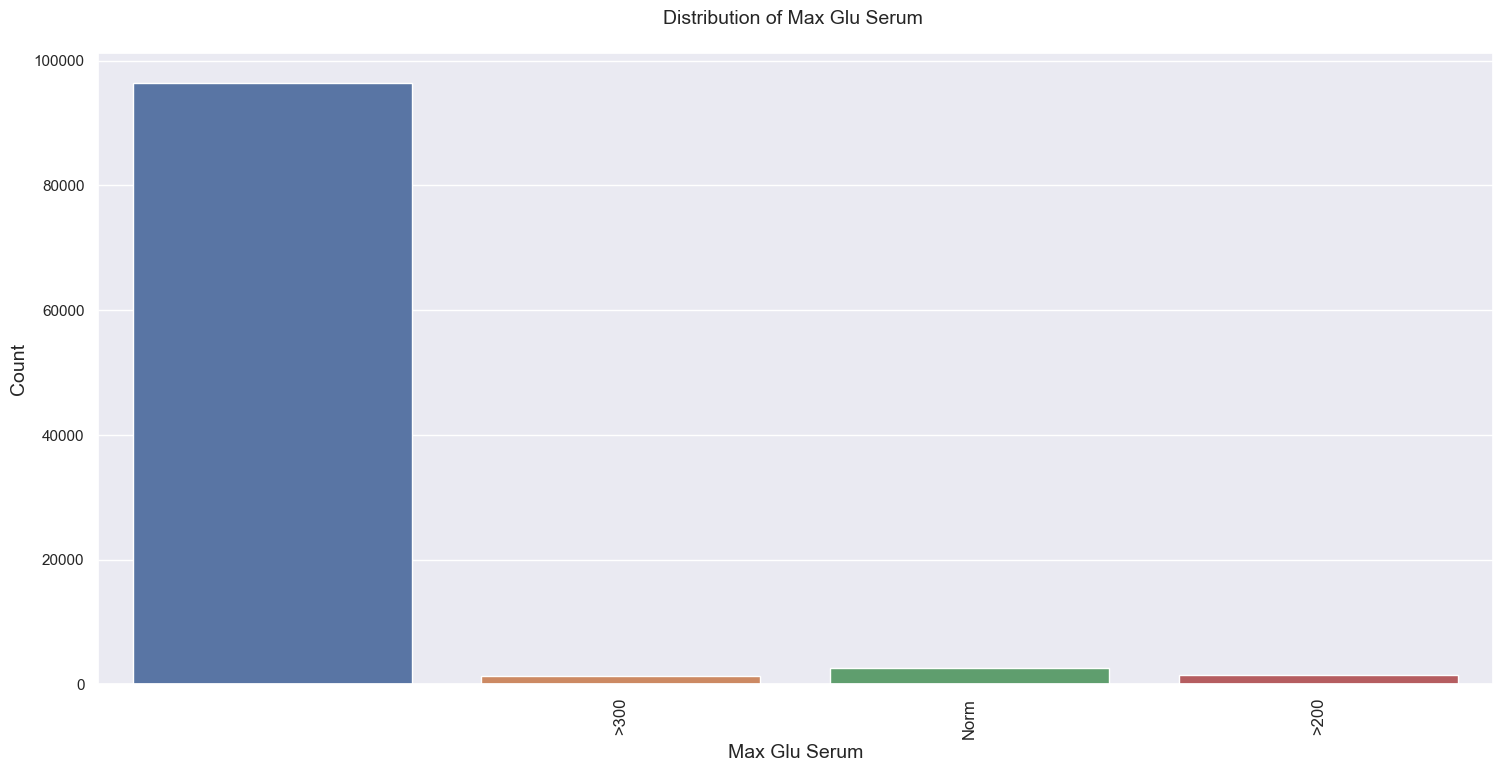

In [172]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='max_glu_serum',   data= df)
plt.xlabel('Max Glu Serum', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Distribution of Max Glu Serum \n', size = 14)
plt.show()

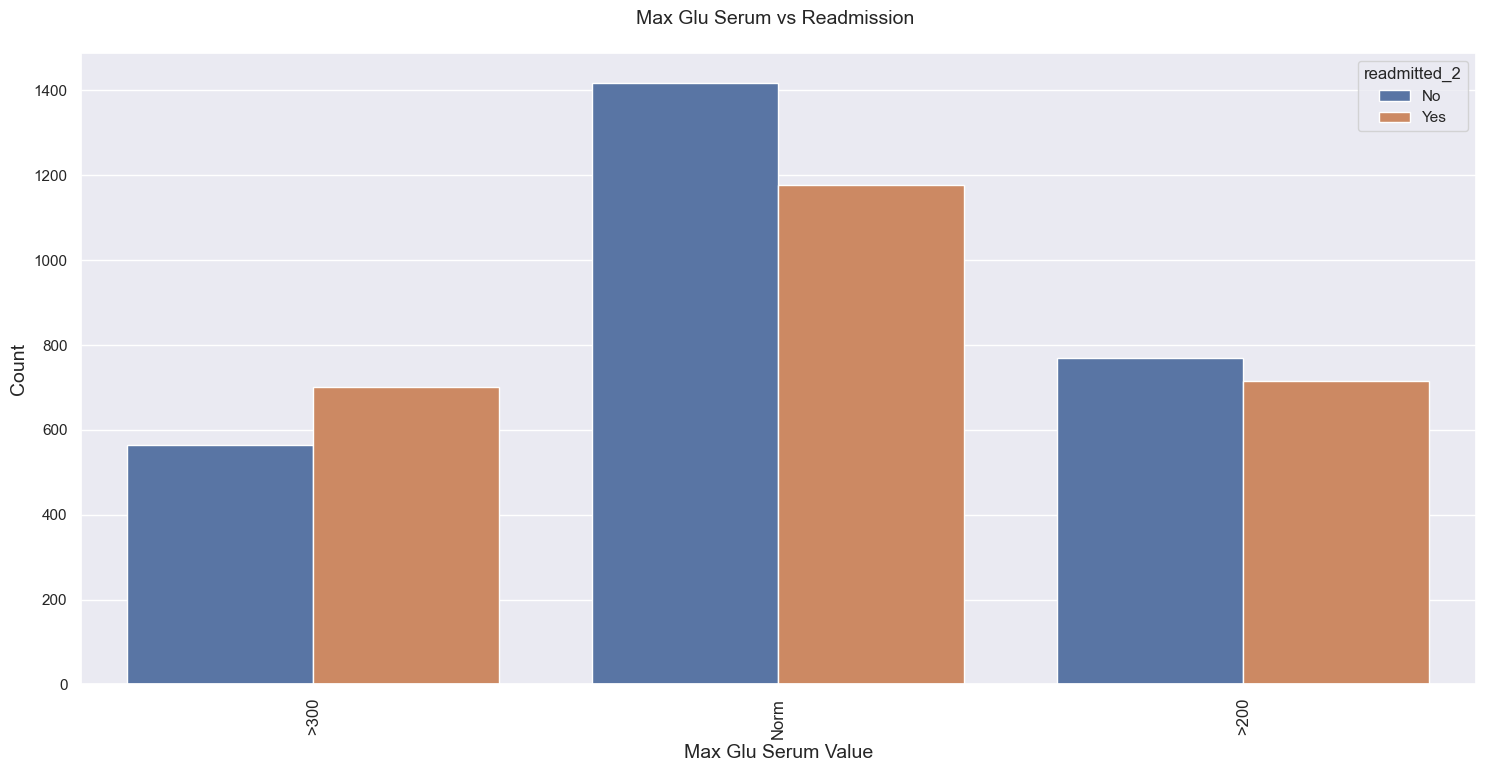

In [173]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='max_glu_serum',  hue= 'readmitted_2', data= df[df['max_glu_serum']!=''])
plt.xlabel('Max Glu Serum Value', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Max Glu Serum vs Readmission \n', size = 14)
plt.show()

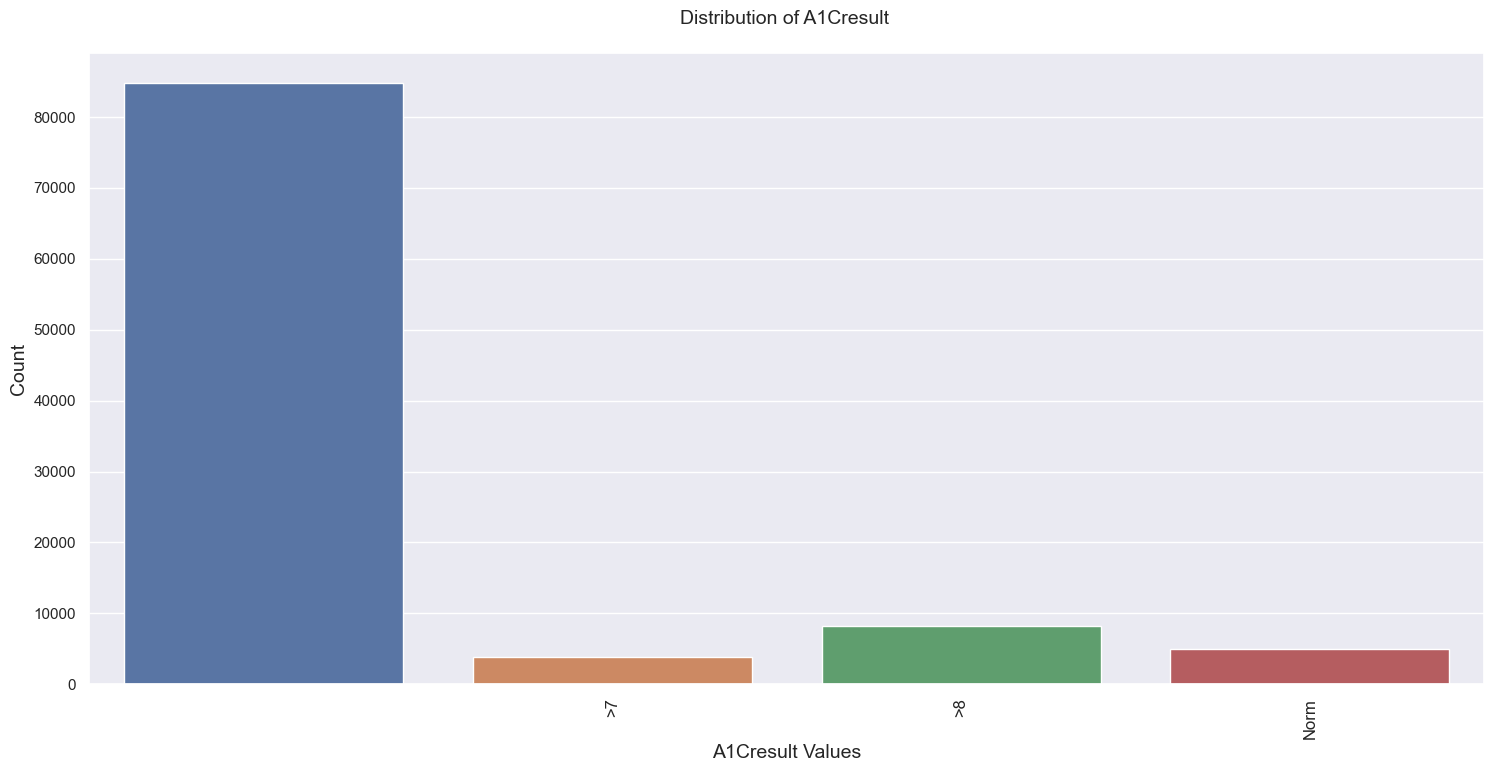

In [174]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='A1Cresult', data= df)
plt.xlabel('A1Cresult Values', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Distribution of A1Cresult \n', size = 14)
plt.show()

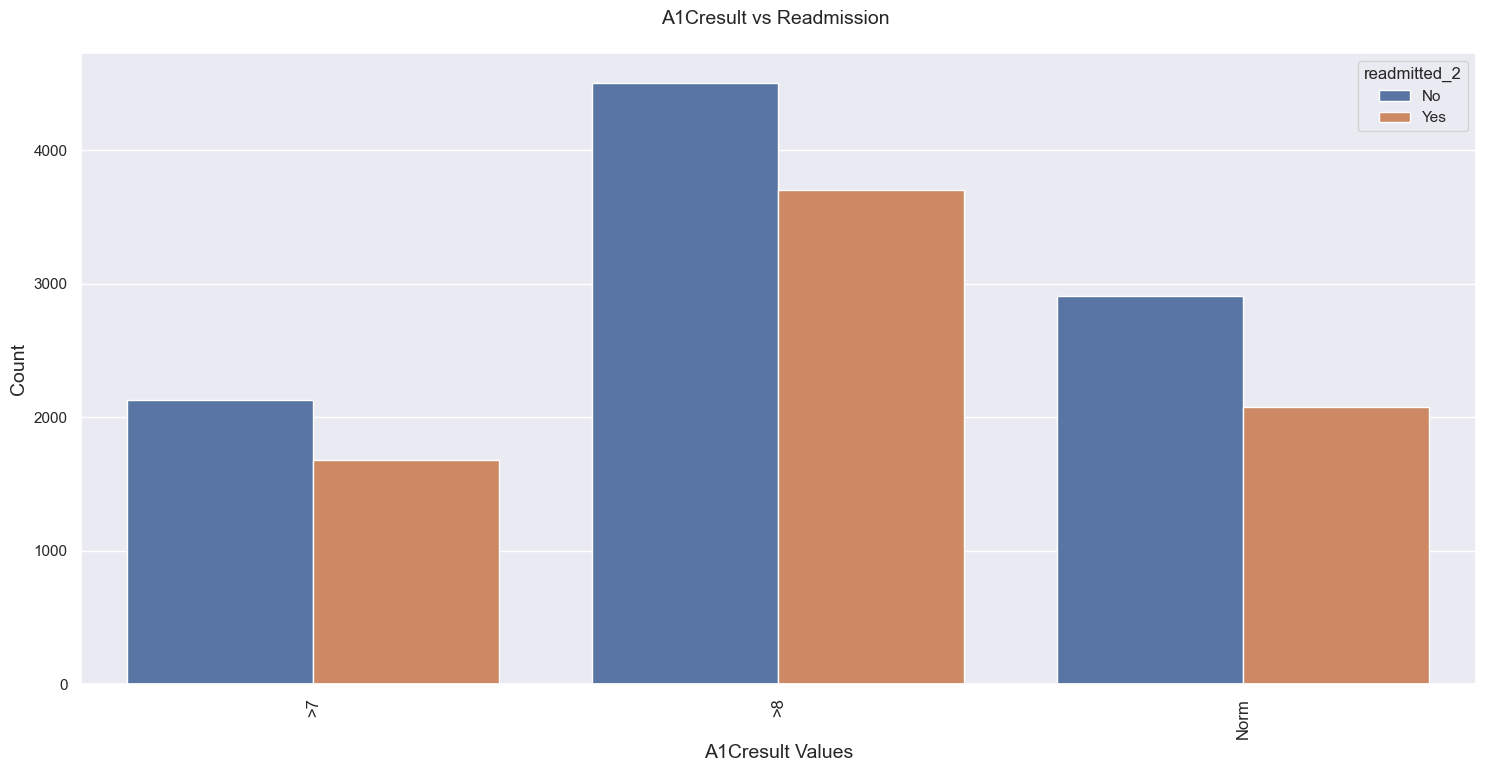

In [48]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='A1Cresult', hue = 'readmitted_2', data=df[df['A1Cresult']!=''])
plt.xlabel('A1Cresult Values', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('A1Cresult vs Readmission \n', size = 14)
plt.show()

In [175]:
df['change'].value_counts()

change
No    54696
Ch    46953
        114
Name: count, dtype: int64

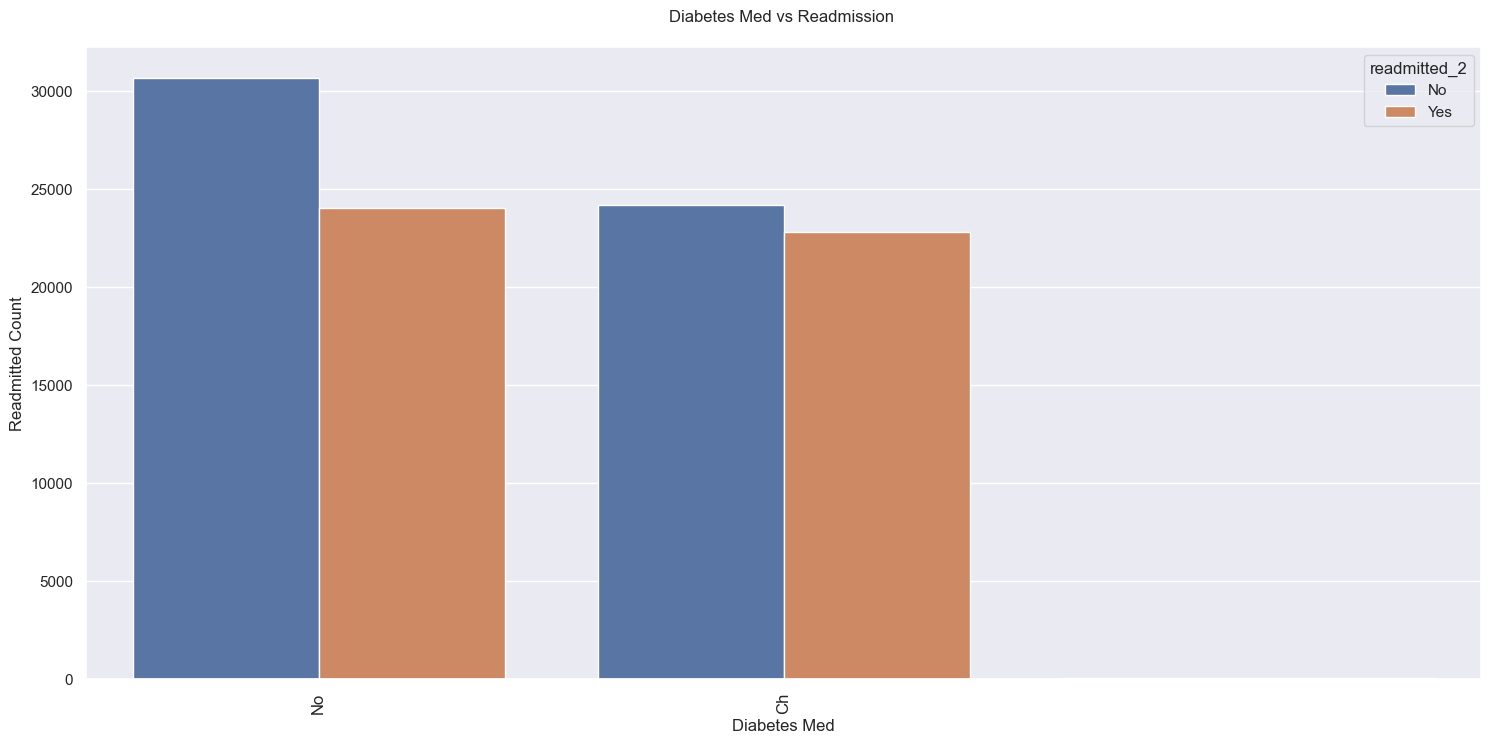

In [50]:
ax = sns.countplot(x='change',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()


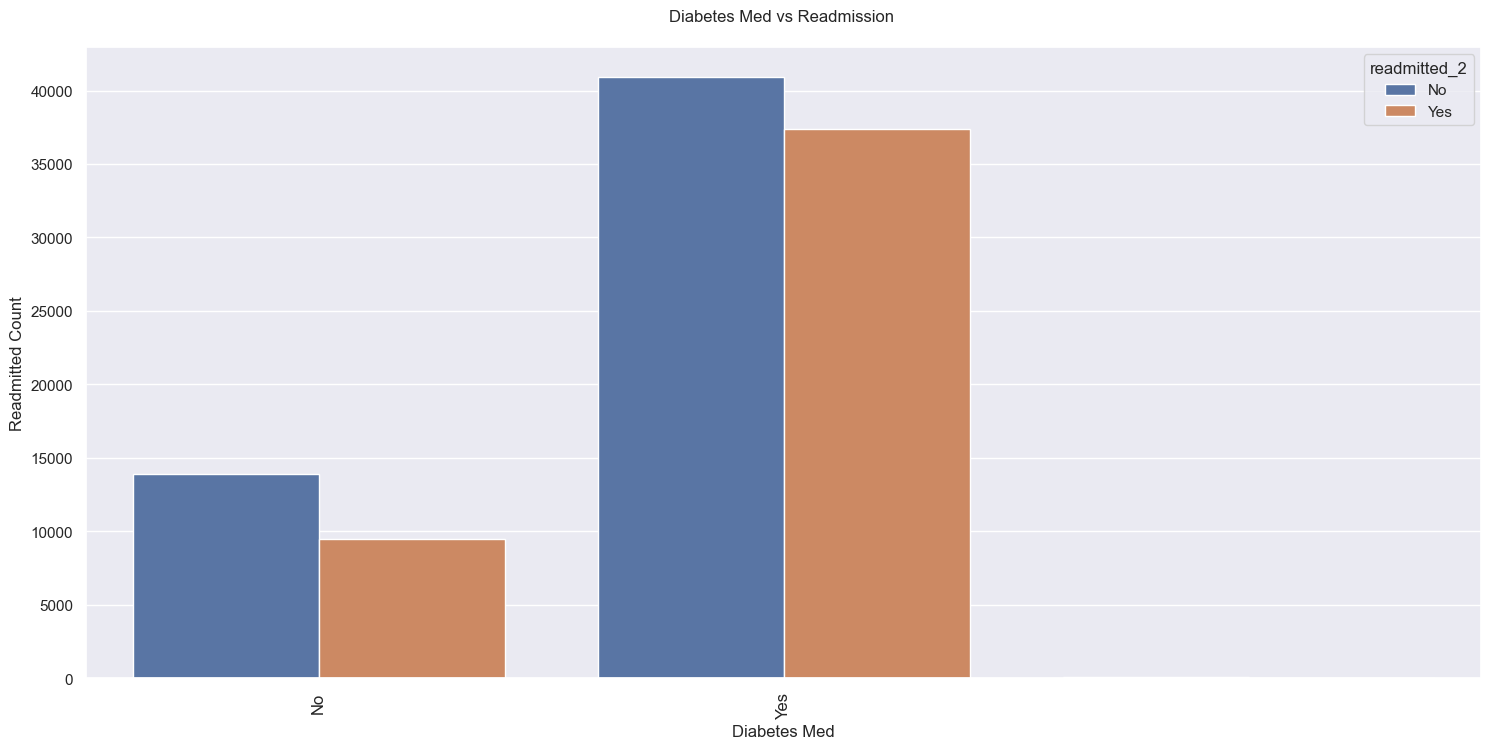

In [176]:
ax = sns.countplot(x='diabetesMed',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

In [178]:
df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

KeyError: "['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'] not found in axis"

In [179]:
df.shape

(101763, 38)

In [182]:
df = df[~((df['diag_1'] == "?") | (df['diag_2'] == "?") | (df['diag_3'] == "?"))]

In [181]:
df.shape

(100243, 38)

In [183]:
# Make copy of data.
df_ = df.copy()

# Transform the Categorical Features

In [187]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [188]:
categorical_features =['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'] 

for i in categorical_features:
    df_[i] = le.fit_transform(df_[i])

In [186]:
df_.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted,readmitted_2
1,149190,55629189,3,1,2,1,1,15,3.0,59.0,...,2,2,2,2,4,2,1,2,>30,Yes
2,64410,86047875,1,1,3,1,1,15,2.0,11.0,...,2,2,2,2,2,2,2,2,NO,No
3,500364,82442376,3,2,4,1,1,15,2.0,44.0,...,2,2,2,2,4,2,1,2,NO,No
4,16680,42519267,3,2,5,1,1,15,1.0,51.0,...,2,2,2,2,3,2,1,2,NO,No
5,35754,82637451,3,2,6,2,1,7,3.0,31.0,...,2,2,2,2,3,2,2,2,>30,Yes


In [190]:
label = le.fit(df_['readmitted_2'])

In [191]:
df_['readmitted_2_encoded'] = label.transform(df_['readmitted_2'])

In [192]:
df_.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted,readmitted_2,readmitted_2_encoded
1,149190,55629189,3,1,2,1,1,15,3.0,59.0,...,2,2,2,4,2,1,2,>30,Yes,1
2,64410,86047875,1,1,3,1,1,15,2.0,11.0,...,2,2,2,2,2,2,2,NO,No,0
3,500364,82442376,3,2,4,1,1,15,2.0,44.0,...,2,2,2,4,2,1,2,NO,No,0
4,16680,42519267,3,2,5,1,1,15,1.0,51.0,...,2,2,2,3,2,1,2,NO,No,0
5,35754,82637451,3,2,6,2,1,7,3.0,31.0,...,2,2,2,3,2,2,2,>30,Yes,1


In [193]:
df_ = df_.drop(columns= ['encounter_id', 'patient_nbr', 'readmitted','readmitted_2'])

In [66]:
df_

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_2_encoded
1,3,1,2,1,1,15,3.0,59.0,0,18.0,...,2,2,2,2,2,4,2,1,2,1
2,1,1,3,1,1,15,2.0,11.0,5,13.0,...,2,2,2,2,2,2,2,2,2,0
3,3,2,4,1,1,15,2.0,44.0,1,16.0,...,2,2,2,2,2,4,2,1,2,0
4,3,2,5,1,1,15,1.0,51.0,0,8.0,...,2,2,2,2,2,3,2,1,2,0
5,3,2,6,2,1,7,3.0,31.0,6,16.0,...,2,2,2,2,2,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,1,2,8,1,20,15,3.0,51.0,0,16.0,...,2,2,2,2,2,1,2,1,2,1
101759,1,1,9,1,21,13,5.0,33.0,3,18.0,...,2,2,2,2,2,3,2,2,2,0
101760,3,2,8,1,1,15,1.0,53.0,0,9.0,...,2,2,2,2,2,1,2,1,2,0
101761,3,1,9,2,20,15,10.0,45.0,2,21.0,...,2,3,2,2,2,4,2,1,2,0


# Correlation between Numerical Features

In [195]:
columns_to_check = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

for column in columns_to_check:
    unique_values = df_[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in time_in_hospital: [ 3.  2.  1.  4.  5. 13. 12.  9.  7. 10.  6. 11.  8. 14. nan]
Unique values in num_lab_procedures: [ 59.  11.  44.  51.  31.  70.  73.  68.  33.  47.  62.  60.  55.  49.
  75.  45.  29.  35.  42.  66.  36.  19.  64.  25.  53.  52.  87.  27.
  37.  46.  41.  28.  48.  72.  10.   2.  65.  67.  40.  54.  58.  57.
  43.  32.  83.  34.  39.  69.  38.  56.  22.  96.  78.  61.  88.  50.
   1.  18.  82.   9.  63.  24.  71.  77.  81.  76.  90.  93.   3. 103.
  13.  80.  85.  16.  15.  12.  30.  23.  17.  21.  79.  26.   5.  95.
  97.  84.  14.  74. 105.  86.  98.  20.   6.  nan  94.   8. 102. 100.
   7.  89.  91.  92.   4. 101.  99. 114. 113. 111. 129. 107. 108. 106.
 104. 109. 120. 132. 121. 126. 118.]
Unique values in num_procedures: ['0' '5' '1' '6' '2' '3' '4' '']
Unique values in num_medications: [18. 13. 16.  8. 21. 12. 28. 17. 11. 15. 31.  2. 23. 19.  7. 20. 14. 10.
 22.  9. 27. 25.  4. 32.  6. 30. 26. 24. 33.  5. 39.  3.  1. 29. 61. 40.
 46. 41. 36. 34

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Separate the target variable (if needed)
# target = df['readmitted_2_encoded']
# features = df.drop('readmitted_2_encoded', axis=1)

# Step 2: Select the numeric columns
numeric_cols = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
                'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_medications',
                'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2',
                'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                'insulin', 'glyburide-metformin', 'change', 'diabetesMed']

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(df[numeric_cols])

# Step 4: Handle non-numeric values
imputed_features = imputed_features.astype(np.float64)

# Step 5: Scale the numeric data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Caucasian'

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures               object
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                        int64
diag_2                        int64
diag_3                        int64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                  int64
rosiglitazone               

TypeError: Could not convert ['0510610232001554052120240320000002010210220133052152043211120001313222030011141000405151030132040220102030115212102240602120010501012000501500100632211216332102122100231320200502000013003000121530015000040313505005326205600055111400601102151112122255410021540000002020010163630600023330064001000111311001012022052406314402000141100010002055351211550466210043104060102120106602310000501114101513000162022100110300011610100201330012600021123511661005636404310001201102001102620032016313116015503500101555302412250505010403036001423110001145056202141234060234032000004021100110410125001000011200203053120513331215366220211033021034101351216122103605042300231030000000010010102402400222033200504040406542116110320220043022510240032310262311314263310000120110136112316340102310013243314341566125012662304230410405133313010440032245610031251101000463061001006000000601312600331002443121214150010011103310012210320100210410030000300133000140000112100130110062223101011105623600312220200011000023001130200121013123203302322010600100000111320051125115000011510010223620234223050341600106344200152205130302501535201021600011001015005140006332116621050311031310011025215020461234512100000321102606401502104200053022105000101023641130306002006010201310020110163101114150421003121610401262102211500032000404135120005300111032310116333160220002212102000205221506123450051313642003263240500620401001020202013160151050220066656221255504006120305620003110001112010300011211015020211036211123501202416430103063120150321033302060212010064033402212000040651000021020461600051122505361402312022222602304003110116212030112103032103006121003602003056131113216005602601021020101110212051110213012213543105510010002203110541013612103000100102031103001002532521306033600511501213400450552000000230550105401122002106301100560210601001616010331010154003000621252615010006211105136042601005001100013120563332604212126005221054111302500010360010310032550300330000000223044300000000000002260500142645111101130213223666104505000100000216200001003001100030100001004200100001500000110005010020601303201200001005201220000220030101103251240050330030000001200060126166206006030610030420603000001006006200000220011601303040501045101026020102000120012300003441000621012202121043433366003101102111002021010443510015010000330131001510103011150102000133006423241001542103213524000003112011000262010161051501300310013102221430320315000604010004103040051012304206042131210020001043011012013622106036601610634030102424043521000602001111012301230140034105140203323031010002601300210102201236011320022200400010030033304002300101002116600002202401105200000301353000100020310034116212101110000260101330030010150001001202000100110021232031100201133001006006241101020002065021103622453311061002036203324432201010000153104000156360000500610326006020050240502021003500350526620303330002001040124001301500020230001013005101140143622011006310000345003210301016051000400452630020101022204131002016225100000532010030633001111400325063024333010003102504000115200150006130005002310501030010230063120365601633000420062310330000105110242411031200010020052003101000200300103000016100000400100201110003210603334111010261062105210001040002010516030603400110011340101006020130120412201431026100310062035000051210330110020263021001406305000030310310110011210035202200160000003521310030200102201014060200011030300012411300102064001001221100202140001001401330040510114220614532041103102321033062050000012560201034102020010100500106461000023603000005000000232402330240301113000000000111123134000010500034260105060311304020520006002230222302162011136004110002023332305010002250040400100112103103000002001003000111000012061223311002140023103000010320000301216041321125130200012503023010021233440101202601610200152012100300010305101000011100010300652320326032651102115022101030033633344130202001005605102250130000010000000006200410111215010000223120011060021054020306620022010420010010000001064004101121032353002120004310000233225222101561000100305300310010323133111514100310450030000105100130100011100503200211104001330000010110601212342335100001000100000100013112501052111101000606310300013260011004023141011120345005022016000040210011260003121503213104213061102160000302113103003101001300100200000340003034620030212020110002641220010110220303204100401510231200300566320200340061021301013212000312600001010063353200202021021001100303011110212610001421003003000150450021030021012101061600100151006030163036304000101115000110026100014031403002000031001511520042121601311113203000051300020221412100001102060401403000001000000300340501210014002303432031042001502001103401343300101000530003020020211210060000050000010036002061043020000103001603602010302001310330020030402253020123311100006600112111000410201000225150113001134132003100013111112050214312306014306000136030001400102106020033100030032214221513101201200000000603216000303611000301002101001011053030413611011021003500511312036050350000403033443011543120000100210531004333002002053600302000320101006000011340000030000001055000110022041100100013205313040003130130610300035010011000000310005000010002002420402313310211250001420260330004521020102342066101224106000310611001120030101143644265160602300060510001031133331011030030623101601302010130013013000133100134000020220015412002020000000363030065000010011100100041011120102002122641001102010302010201606011110160012000111000000011060010024014143150122021000060104015004301052016526226000231103210000100000111100100000652230100225020001110110020000100301003001100010012302000020262421130502100000023535000011503261020203300000300016032313143200001330003601101003000120223011002011400105031100414000151100524153000042001112001013105030110312061000001221301234240000013200002101120111011163120022020112213601040300140041412101110000100505611036540100211000040420130553030120000001150065104120113660000300211030503260005601213400010030202422211025204232053000220201434001200230020441001121122220011010202104320061020405130100201102105006002220013041105000224032212300103620121000361400011004506100000261500112100014000051052000000140112110212102112210011403350140101113360100000102110230102100032162500401006201600240102415250130261032540102122360120061040010302010223000063403443260310002000000660102300204003031102201010012000041000166030063000313126030355062513261014210101105400000114203030000020120111022061512121000100114500012001400300000212010100313020003510300310001050200003213401105110401610300013002021013000010000012100200010414003401234106211262412001000156002120052512153300322203030202000521100101403256314204054640011260053602151010000020630334004010200114134656101221200041106003201100140160205100100004121100141404010201256044014013020601201010002000320001310104016210300056014102500235020220201015243214000141021002150312214124351311102312000201100061402001211421134151500123202104031300060301123000010036000102036050022101312130210000011200153040003043121432035203000104023204003024311464313111502100143000104150011000040534010100000200420326050001313000210206003000000012331010000030040561030060012000156000040330010100000110300153000222040006106010120020110114242610021205311100041054130300024430314010035032001033101000320111000000011024020242000602110130021612021001001001120220216112010136000400122200000003011022022200650000201310126502135200010060123004105065145031263301010200014000001000000002260121002010200601040010100000001640002022111020465011012011620344002000300000110106100316524110110212100200003030110313020120200200023031125000206114601033001225500016002001100010000210154301000000001060004035000406230500060212630051050101010000306003433002101510304105161252611455102031100101401003435041035301050150210360030000013022003000000000330211103140302056250010224500600031311530102500001011040202103000554122021010050002000601311002005116210034016010002100420100300050140021220610323000002020112000402201000203000036003004001241366105500303103000121502322551006011020000020066021304532122300101400202002666630000240311002000532311315300101000002022001510121013000010322001100200110000002150040103010101200360160100006000110003346501010100021260526141001121101611031200414334145004030401060000013410652310000220110000263231222366021102131000200013005263311001020310510200221106002013000313200040001032303100000100012202030133041521300000300241302200300300011363023044241310002000201000302000123000010032410101012033320015020006310234244036032400130450020010023520200202030605003310010600220600511502531000000006006110204100612103060532300026200002010010100144612110200000002610106111301151201200033216113206660014104002110531001220125210250510003005310000011000040104201031000000011531613230110140200031331000013001002315103210232212112000010000133101104000006003060040202463342020001622001301200100316143251010301600303010010053005315152112120013006030000100131111100114000520500405600002104521163122040000140000612654200010011120001000000116400210011361311206304261322020601454363310332234000300015160211100040000210110310100314300043100000003000502121003062002321011606011113100651403410100163100421000220312620000001323600010000200012110021203000203201000015031041201000020032106100532031031020000100040100310501425150016302000001030150063110004021010420000013201300066101011100000001315000020020050000101140025230110501513300444425112611001060002621302101112036020560355101500001402420603001201001000001120200000643640615202262450001100406101100300003000630003030002010104202411116313231101323603100064030000001150231200300401325531126000361310116331020430142060110002010003200000601000006210131200300000411114252415404000112000110300100000010020031260320323011265200000104150010320220013013211420201326400126011021010110304262323001006226121014052100002120310101131000201013113001601432002101021113001010060225001310166062052200224001003061001010111000411101210446111115210413003150056210402220112315110432000003362015113130141231021200010010010236510521513013234010003020050000412020242006000006011205000002200061102014301030002000100112425105240111401014300102010330000310030000125630302102000120204010215110300063131000010211020141310304300363020000001030310011000020000005601211030041200001300501100100000002202412400310021023110125000140221110000061300212623050100010102055131604021522151200160220001000410133030150366020010242230226103152000330230114052301100010122010200012303230060016001436230006032600030210423131026002210100142200003001261100041312100110622604360400331120111061112102022000031100006001165021164213000201301016100120000061320003150310043200000000000000004100101003501204040003000000312010365461100560001223105050002010021036312312200010004160101001314000002205223210312000000101103112306630520232200002330601020011001351410110121013000300002201011212000100020050030110121211102103000240203000603001040450101005611355202101012000306001211020010006533361110000510311311021005011542104015402402021006021410002001100002115561001010000100165014010100300250316011000054010001031102503212231201600120604010101003440210023230610001004305325400002100034030001013121052150122264521000606012000161126400121602021100510243041122011001016001000101040002020000200302260311145501020430160335113500603010442015020030050000041050110123060300660050001216161000100104004011020101231030610021050001201002060220100110000142002000200050012000003011401403001000642102101001102100201150022121300006263325153362330120102633000101102303402010633253121000100030200014011100100010021010010002104162360200020401013023020120301101120420010202105246000010062311141050041351511000005132025130101561020331415021201023312413021010041303211400026510002141311101144410434001010506030000620421133105102002051131103150204122220002002000200006504000006021021015100013012040102101200261020030010200036320020500011060003031206005100331231416234321130100300011662002112030001000000034241014110121020131003010000000201350013000010411024061051000611222212100234563300030610060001022116620110010110304010240100030311223013001312020016600210006610260000001502200400400324062202426001410500000100003001000010024011202002234105012000103161102643601011533103020061152020601102400100550000030120300003414456302506023101212301161022151601111115150320200152110000506300011112136120230301001000620010321212211426004041050021164012100000020000210200511000022011000120130010401100010610433216031100203312100112100600040021013611111251660602000450226000301342400014066104001036014004022050315500000101021000325012030300300331401230030023003110010200000200001111113001232103006000632011200161611206062500200152066241011610006003025105065660003120010000160043020010002431621105103002002000030300010031213201002122015000115201322000030100220000000230001000011240220040101010000000601361012310020003016645513100020150000514350331501030115443020030250000101004103100206104001201010300430304000003100312500001000100210400200000020100302001005003100005633400022025205120315100033000001120310203043102202031331201020100002241006402210501502060000130011000020201124000601300004000006101031000000100000002032610221405052121040001021140114110021003001200016420010061000005531002010142401000304111000000012303533232041001230001003003202110100336400030002620003113020231001224102410101003200002410200003230101343430001201020110311122031030105121020120600013320010013211121060302611100020302023300000010113100200300155100322061100020002103054003010200100110141002600030330006000300600423610062223020132022500040100001061000010041232004031403010040001214621331001000001200031310030123130011263140002050003111000235403002220256005010301204021050410011016000442550032050066001020220041325021000001161565053100300140010020012000100001100602003100531611610030210213006102663020430444030431101310311155110000010001010030164100200002015000612220042204103046520001006121000320503220110200300116104112101100102101032110352130140400400406101000600301001221635100301103400032050003000061053600030133020016241011301061010013352111020202000323156342330103200101230010130506320041000004132001002210603340320115606422002601120201201350121206003000220002000122100015101110000010204106100626120011111023603230310132112102023100003000006140050000001320401513151000005105303130013100303360200040323660200003510001105000301111000210200631110303261601061101062034001013202001120056600130002466140061021006520210000011121302411423021200250000020600010010000565052003604203601020100000110033101312021120003111032053602100000011362442622102410001261111042502003000251005000203000001103000500000323255100215353030002300205020000034122160301002005100111610613634102060611511460111000600100611000160500231003211003305011005002266053021201020014030102100022101300301301101002011010020001000300000300000003200511401505530121110400000202010623042331422512364100003100600062030000211310305014413600400020030123061160135061202314451560401003031010063154005501320000000000001160245202111200330300020600110323021534030013210006110021013050500120356004010106042206301114440621010320505100020002101040043335110100005260212010331003036000135330003000216000501000061005220002603000020213160013123231412300000005100022200000101002202000341500331215004464160231040621112022504320064103023060052250000003430021010220042040001110105060605012211465002010000050001001013011000410200012004102000201002151110320160020051335512001550111026100326200001123466100011110022320211000020650310213104012151151001300102022300002000051311000320400310001030012030002000221111000510033002000510101003300210200100020100001000030006302630100100331030436116001133424000110003000211302100130024200010003001003500335162126000600100202132011112016355102001050220030100050612300004100010101500042202313321000010110300201000030335000311231014030050015400033001310000033000403060344505231121000000235115000605400201144520600006202100315000513112101100160000030022020410340030202625402330100000500030001102003300000002000060030412005613310203003003113300121211640613160001121113000130100120363013001010041001010144011511022331050003001104004230000031161202142502300061001002130565201306033310025025000050102322100001000030001023423322202010100032403010626060020001160112011200301060100220501154500302434005210121006351006112010200014133105001026005002004006200102103410010261250201101310501000500400031056536520011000211010211600033000234300110102030060222615002520260056121520600420021013424000000233314530100101001606000310005010010463600202622202002030102363321010021000031000161106120005110021446161602020000320000102031502000132001000600600202010005532225111306400100113200002000010000450105153223613100010063061601000200002011310001520000000100003002150110200316220223010003502031132002003010030222001613003000001000000014004133000000010366223132601110012002152000225000211200005102310031311200025220035010041031200511522021001226152000023106010314165320012100130001052303033301030005112121410110201000000041030000101200401500100203000003523050023024520245333631150123030000200000003220000243100360010060000213432600000100212020520206600000001601111415301130001011111332123100500000422221211103012102000132310131610112055200021001000320003001000001000011011302545213106210014003000150002100101510030231203210002051000110160000335320000011030005213452111100022025130112200000002320210024605010121112115111300020200031201300001123010202003100402134230300005311200610111030630006320300032161021110323310000102011200011001011021200110031430600232301135110000010031030611000031244002032610000120002100502000150400000002030200212366520155001320221130500120301320031501021210506103052030020610010200101623311600002010010126550163100220300045001000110312413002021400310263000430333300030000013301010031301000306600010030000011021131054211202511001055100003000100303016011442121060150505152100240521050001036103115030032020001010103011001102460013102011210000300200100050203200006014400110001111202031000000102000010200622110001030000103041001321003104015042411100030016012013034310222230305101302130052241002111164100205064050001000001021000051406112000010140602350110224010645233100002202033020010006000100120020011010000000030210100030010200611110102201200300600202122006001030010210020043240313100000303610035000051600102200000220300011110021152060300023002012221620113123123032002000030016203000030001111003011001001021000023003401021150510030420003213000600041132021400002113120202000322110030011220044200410016200402603330123000100001011060511010310102000032012023000223206023400201010011005213050030310000000600104010005013213006151205113041200003000303100006024006633211053210306036506000031110064301100012120556104111400000005010000042260206103100500000021041210050055102304031202100214111100002011100041200100015003265000121000041304100001011313000650403212062100105641004622140236001010600104100101002412322413053222100000010411160126210231221616561136000406210003001150016000100033311030130100120104205022124001200201200051320000030102010261000011002132300101000031101211000300600123303122060300010033006000036040001343010252065640010601200014100331041062010421041405122225101203001130302210463051140104120000110013060002503022101030200013203100204022302030010003412310141021212224140010331050110230200340301312005402033130010341121320031030665022200010301020116301102033002003001103036401105026200024400010000020000013005005012060250041613220111061301110613311361623054603006060600323105351014010062512162601006001001102103003253025332021402010300020003114213024201001125000020000001610620000000226001110002110106302000500120250021011660622011110004003040010000000000002034621160311050322200222102200512004102516035013003301312001605001002060204120004120036040202500025112211601010012011000010000133051244200002304220050032000000000000301100013151220010020231144000110011101101003051233404000500101014001210253000601360010603110301100304001100200103004041202111020144010020100321100361320100000101010000020412000000000012312102202400202030103060006002100105002110511100101000263310001300001031041336064211031010010201131533020040300062210101022300120104160002301003200000603000030210011031000021006000602412600001020200010122000300030010430202002311400100106304006402004000102065201200000210003020220621230314026011023202000016300002000000310106100000000001461135120060000000313210052421020121060232000000000543201004021436621333100102105000031003122111026116152011034116601010150102300212624111102541210600505066060200103020031013310110116303016200024203016043413221243300610503630003211302210121040110002002010000100031200000541201010000431000210000202210101500006040011300111105000231336155336030000300000301310400331440661100001640023014042400300032040151112211200600011220302004310010001001100040221011120031000002302330110000010142002000010110030301300214111001256016053014220610021600001130320201102604030404010060010500100410133421004311303000313621301056210202000000030002032035000002206333036500310000101332303106001212601100004000163003004006310021000001024302000142436110600600220020130400120466100100602200000540206130035000002214001400156002122012221260242025000212010026221610202002300104301143103200435203311200353060300023100000012311304120223043006411003400300031421013120212103062210020102000051205621003614211124212313003210306112106004110110222131010600216160103011200010322621340300050100063030001000036305040002300002201202332101012532230002000100160600203103020001100003001002521011361122010102033101200003622325144321100263001062013030000010333121610210000306004160004010360031110602130100110300000640320010100446632544001011110100310001200000000000000311113100326000001010643020020124411100061023010013211131000500300016600021033060060252420200200203000610001000311031236201135001000350512000116010320001100206131101403106000623000360100233452120005005025013003040011100005000000203000015161003005010200002650000325221112162211000100021301301022605036302110050200426000103430016012424010000110000010201350111142100136301100001000021000600062010300100040410301631000000120000062010012110400016310011101212363100000001010103000010050111111101100002033224602110012310535013501631320111110100102266300413011032003003121030041210421430163030460400043360064601006502161151114235402120000002313600141001051300111000311062001063202312020010600102014240002351003551121030203003021660603010060113330020031001052300340632120203400010115333001011020310221015011003004323121053111000201323032010013000530204002602010021303103230300000213020200111110211100050322000024010032206104120102031300000030202126311020030651003116005143000564100020103110011215630200100600430404000003303220001103110131300103056000221300023033111012231224004030220130100016101102010100110000000003561003012632003000000500302002100030014141130030112010633066100410501120101312121210230321031621130001533000120001013500022056101100330301010001560021050165263201002400003022053001054520415032610161000011006003200044051300025020003505101006100000641002343100500300203600333302212062106312360024023121201002010001001115000100100001005220110006131410301060150660100030032120143611060501021102105412060510460110021303102410000320011633010060310100101050345401236220612220021301532402203033105156511303625026003341241054003020200400024100401101160010600150010500060611020020622054010200002130000040023353210105050101460100031202300361026112302602411121210005100620000016003120020201001500620003310061014300012000001002221100101000014426011040030012012231005000330000001150000120041000001220420035003000000610001310002120001112010010200500012031100135300010061330200212000010064410010031110003001010410203206563012133100500300122200200400001112313031400141610041201003330535302000300001100300010021105000210061100101101106001312264024244042100506211030111600200002102420310000020040010003300000001032002343366111241131153200301011025030001105622012312000010201030316110050320000210160210100103320012102002616401216210333002366335002010112130402111211635221303316006000000200211000114000030610020110622010300002111001030110003200002610523302033300045303100000135263004023021021601210411056500320041221003350020103223502112204101100330134001425010036151202060441512040303126000004036102030003000021010006150032400310240003206000010001100002002100020031111000001400003304301021000200010020001022142006030043321600015204132210101011300105635601012001004001111022010300054121130012266020342102513030200000010611160100104000102100400560114050000052023001163511622000010003203251101010000600000006015021003000625000300006162030101022110150034425230010306421000005520510100100501102005152225001321210501252100003130300101403100220113006006046042004104160011200120626301200005230010230223004200500100001201124103001101040361100001003361020420030100010461000201200441003000000400000000001000521300006200002400404436300001554010112206100300000005000063153561200120650033443200504015300010642110420000256001100010201051036001526010413640012031010230000200142440000130021206101003361301016001010000110411200110004600601130100000010001251000012111000100003303000100022000005163332012123160151003051110301120020101100220360000200011111614111323312111200240134031130510500106000412230360031002212016023223230113300020460100004203022340300321241321066014231100020200000001131430310200000120001122005210202000006030006304100022622060013200011002000501100140100110023250012111601430010210060002210110010012003002520003101016300001201103122260122400160200300002200532020020034504003040600010061001030423301602611311304020060000000000140013002100005100000002301000110200011201514410200000000100606300013001210001110133021235000100602213535622410210120100222031200221162610031001200006033000201520201106003032160013050010300000100000200104111102221615610000000003140102003010330345200010203026301201052000260103201120041061410002002230001120053634000120202116105021300220020103005360010011300112331004120125104100010001011001001410024001000001003102002110122021060134060320104100002010513104000130211300004200010552032356035006600002262031020111001003061013030300050230102015000001131100122001400021104100001124211111102310304310011110003103311001250200050336003120114431000043000300020000020011001020001361052035003140530010042200000230102612213003313002401232610020200010101003001050010103033331520030100000010201212010400000410060100100330011602220550130300001020123100000020000314201011000601010230011100100630000202100200001005010120050115100001011012002036000500020010102003102322203221340120060100100042020120010563041031004004010110101000303302136161000030010421200013010030130001101202011000101113103001314020050363200111122234105124145200005031000100302101600112152201350100060110600036110303000332303100110010301100103101103600020111314032101003011200300000010514302001000000101102336100031000020006000100032011050121040400410534132101040003111000634311001020040100200102001200013110200020300040001001000110211040210203030305342101032023003203260010030000001020311013000020431300000000201100004003101150161263004341022002042231206031100510010000100110020541032100110203010221600110150000000331102330021321510000010101000000023110223300000120100222125360500350130010025101313110002020311220000300241200000012010000550000101220002000403141100000000202165000100030110000023324003011400100210001101060220365203223300020100001010022211160011050100013121011601200243121130002000101115112300310003112005111661011002002100600012000331011000305030302114013123300210010100020014500002002001600010015102100003024101013033001130000011120141030221150010000010001100050113000606100565003104131000113600030521105102112020211001110000036322310002020012001201020314002000200030106000142350035000050000013026000300111002101002403004210100100300200000220001100260611000055102010004026150004512001000300123100150040002003023000000200500020002200002000001411131131040003415000000000000000101503206314035032300041161500002010100310250111120106010222230010101110552001205030220001003105021002100000310023003202322010300122000032200030023031034060120001102132111112023000000251113610002300035150020300003112102102003503210200003320010202000001003134011001340410010300003062111050110220101115030120100205114230614103603141301050201024101200200512220022020122110012132101351010340000000010000003006113262101000010041201001030103210000661021111300002331004406104041011002212403051100011202124051131003001001000011001052010020013000513001300020011001130423220202130010102001030002015000121001102001032003023012312502511101101000102101111102000210003101313012231000301301003100300000515010001100020403012101003401100231121000122060301301600110100060002052003311101010031231000310101030001203153313200104000000011100300010103302011012000300100212111323133610200200033000002110213122113120213030124320200105023111063202242232312220120460111630135062310302031622210163011521000201332111111000002200201101000000103200010511121216113111363000001010200413132010110032103010315004002101320315005131150004006013030031005121002121302200302000520303562232200214000142001213003040331020210020010200310001033203201112260100000022011311111306000120530120014231001153321202020000001023100330301031302305300003300030200005020210040002113010112333105052302322010400144343130000021030130220010000131100100030511213121130323053150310111231600032160203300030200011020314401001013121003003160101203030031002003401001060002020023000110510001300012000110100310104001510100010101030100100102222013220323033100200020000000300560622303031020003001101102200000112321111103202220002010000211011030031300001000051110322102201330011010031201000012523102300120211400223303131200001000100200320000433223012121030122210101220133160010010032100004500201200241152200103023023120221230612210000051320511101110100110221000000030021101031000012003200134200350001303313000030002002400010035010023225006120021223000150201001240000110030000220152000200312120000002105020212010004100301222200010142301100100035231010520003103101030230100010300336120002011330030030023000000135010010200000034021500300033110000100003130000000100210101001212153003100111210013010100012100000111001001000010301211211413240020310000300022000020225320201013102100001000211511231023024106002101500000022101122130431303010032101150001011032000010014004000120010630510003501203000010033043123321112102003103012000140010112110011433030020002030006011200210400500010000303220110403001130000602330103201302500212203420000000200115310003041055011206011011001000136012612122104000100210130101333100030020003320010120111130103203011012010021104202311131022022000003010100000000101000601301100310310000400000001300000235012240100000031000600000002211310020110014035030630121000021001100001320231000124130030402000000012002010231200001523601132010350001103201204002010000011100002001210131013201200040300033316000110010200200000001202111050036300130123211251125030000000202400022002003001120101531100013201020100005101123050010101405050100364102020001103200510021022022110131020003140002103300100111033301210201213330120120040303053061206140100023133300110040000035033000202120303002000202000301063003030330043063260000100002620103240340003305000301120010011100300020403101023161512000100302201030111000043502103010250002101002000131311112535501111000100203031000120000000040006350320201100200203021120012001301124212134021520002153110020002020320331300213310033010551101100052433401000212321230010233140400120001230003323243004125200230100352411002001031310320000000100214500010030000200045000030031215300100000020310003010031101202001232030002000002021011102101420001030000001100625111225131021131504234310001100311120030100031021001002033100001100001030500000300350012303310310001010100110032063100021000001001301302321222220012001000003001001311222110012022000000231303003012350011530013203040100003634000222313102313210000004010001052310000020000040031000163003303300002200030301112340210015002000005000032010015000001101200125000200000633033030000500010101011100100442002010100021301020030000052000063330100340006111311400000201113101201122000223233110200111103360021200002010101000502001030000002110003022001032013120000000300022110300210000243025106001201010220161122340302016000022300030306300030232430100100101430002213103301000005010006032031111031033222050000110200111121051601103212033115300203030233200630033012000500520100213000000400030000000301200001003520300120003130631020001100036010430301201101110230035000003102010201120020000126020333003000100030201013050062120110126241212010321023100000005000400202016022036020131011030200010000040031130000030003003121450110020131001001142220606021020102200211202003015300003001011013011200100340050030610300300052111334131302000600310001200602311022010011010020012100230112411100236105150010600200224002000000200110013130002000103102000630000110002110003030004100011011111010200000000110030413000153200100010000040000020131004212053000000010012303201250000123302053110055020120502000025103026000001016200000000030112462000005124000002110201100040141401300130240000133013030412051020011212040000000010002102010210431110300003130053000130100011102020360036520011130420502110010030010100000204302001312010000100000400206020000020403020102010041200312303030032001021102036025144023135200151010201003101201343514400052106320313620010002112151003001334204200020010003052136423210205000000100030323333100000303000032114020101003000010002202520012111221203502010150413002014201320405511100303030111231130210025010110003002000031016015102600000155001113012011213210030306115000330215200210000100450100011300133021000310111010100000042313311302624401021011020002300043021300006032111105000010002012115212433400335300013005001163201000230140112520111050250040102205040303003211150030110005031133602110100100023006212230000001000215006306012106004440120300001111130232200131030051035012163151040000000200203011300110630003001150121002111002102000503001310362211333220110520201105250100200205316111110121301302500102200050102306301010320103062010010520011020625000310166000300223003306050053102120450105200201160340250106203066022110550023001402022133112211401120030220101001003123121031201054220030000000200212000003120120000102130324023000110320330030002133114103000301010001001210251010111005141020150521114010001040361102011122200050040020010120120220151116312302030530002110012001002110232011131013000000010100106100031020150020343131030130100000025011613001160000022300223021600000240010100010015110122305010000130010011123100010213020363400300406051030003300023032110005221032003003111514504050310600201110350101003101001500132135000112301103311100000302036030000003001000000200050000063010030001000605004533232103003013112035010010300115000101414203133002221020001010400010501013030110513032000305020246416220025211113001011000130100001420043321600502110020301002011000205002303120002000000000015502000130010202001150042010106121113160025020122253102000202011015201364264010001131023033101122140103454101220035010400102010005301402111204151001056002200103130320010000021000200003000140014206100113014030112010020100300130000100001000013066361132001001030000013400600000133021235000200100330113143056600103100030023305011002160440310200221420310000013630510300143121041100050003131062006200223000001202001233210001030000320110001430613022002320011630000240300003500500131401200101300002252220015033110231106004121052050000101320004640132012220214010200262121000030010010004401032030300451305006032304023141111203011134160052002111005032500032606100003061412245110410132200300233300604400001330001102460360122003242121001300000224110121000214031201620224100026365304053200130041231240232011301010200516211002042534460030561331301310203021110110433261023000620332000162030000210112011136111464330040411010200120320021011346301200100014621000000102001322510101003006111101010322105013400011300000132200020200001012610016100232001001021000002332231111504003600301302222131134145010014003000000222066320010035026230012321004000103214123316225052100006312130124001622000300051416200110021036031331020300121035230003500010050000030401561035230040230600004606323006511163062336445263204016410326514601100132000301006313152301032603132460260020201010504120406661510546013401212301000020010100400126120002200010220200060100001251212101003403000110414226003001010030133110300330041202001113100230006300530002630010100000501301132402411011311105010600231031402032211306306601101300104006330102351011231010112100001003201103211301100400430011162000401110130050011000060610201133120210220060022210005232030303002011123323100010243060041110064132233031120113324004052202301111000014463301300113030026013001011210403053510100210000150122033005013011060002011312200214241300252131220062662030006015131036200111611301050212500331000002002021551110123011100131205033351600102035100641631022331101110110000010000136403210101003042004454301050001230600120313021051434000010103162030312100001420021356300626202423022020203500010012010614051112303165000432004150340102040110042121200053161001015002133606300060006301131220301153500012010011001021632420403231032520020101315040100024000113002302001000231010000122016015102503011140006030210424311010611314201110302000101003140114161102000000000620110360114021225113066200300212020031301120212121331361121021100360341140220010000502321524014030111223304300326101002001020110426302310000510200622330011023005135000216003000102451120002211030321310260110212110000002301514130330021125261012060012230030020211360400003222011016100142000236001401000422102023132201001034060113002210046006110001416243106020311360011521030113003134103405140111423650603100002123301112110100320031101043420124020010306001021200001010033433011224020430344000111112000040130001021010600301312126000106212211112130633200000100100021210020004000013011302200014002632101000001204000124400011111111030010111000014130100300002301133502250200010321130310003300201030522106006321111100006402411100010112012310214011023412461112406201112003000131322130340115030000101120000000403000301041300113010102020466113100006211001230000112103230023004010360020100031004053300026220030600002000000001004102050210003126363211324432000330241140341320410033111110150500304460012212110001111001000023030613010000101003110116016110002126010060002000102103100020000120216100004004006011301030004106100163111461215224033124020103001000010014122006332000200610201010100000310116404311120010600662211031005001603600002106003001001130030100221400040510200001301011031234360300000030000000020002020100502033301551020011500001101220022060011233220200024001210461005035122031000160200000023304602000310030301000000222106061110002252005124061620000632625644311030501023220000003520110011221162421120111320601411112310161001103105113220310301160021001020253242100630014012061116015002021203064100200030451153314302002051403102623001123124214242010220000201333140011200003140002060001013000212210011010446000006000000011201420301000001130106000004021145212260400040040300001001101634010212101202003024001132312301001320502201111601011121030100033030150006000032035300005010000023100000100030160110400002000100000106130260002411000112020014321205016302302020201051105011110510410222600000200612126630200000000414301132001361500006120202112310040003043501223031051110310200300060660120011102013000013120600513051000000301122053520010040012501110020611021100021123311200060101030064303233312400250162220422543110100100160000002131513240243000002110200110003111146021301201101110600320000504324000030230010002105200113241000001200311003321040010130100103000101020011103301412015101150262002005303220000040130021320402001000135250015113311000030201100500300036211013000211020100000030022061010023304321110000001200610011553012412010100020060421100000010300300330614103000000655013101412122331133010010500002061001625040020200110320030020203211201231236061002020502100000046620002301000061030611206130105000026301101403001303001005100003112112010163061220030003311130305011166102231042006510623001101311100110015061002011003410000001016146015202046010211562020000321000260102522055210015000060203001263212203301610300202012020000610110331330101212324202310012610223601102100100132531232002260121100330401000022020223060130303400060320310244001412244321111153000001045210033240011620121120061010031041203001050161501352221201313353110331311001016161220312001000204021355002010031240001001260000201310310011510010220235002313000203230102100331121211000040001234330033001011060000304003061021300000031120000010001130161202002103010000510020042301120631041001050011011001211101602013230231003002000206611000600341220311021310552200001023126313022010005002400200002001102410400000050060200130316041224301012221006201011002020003111611000600242200020300110022011001200054021001043031124320102015042160510001100000026000110102553600212206040002013100200100010653000620003011101100030035202111000000001010023260110000051021200146520400151050130011104406011100012223110022100066040011006001000200114360312140001222100400001122021161100001125100423006111023041213230100200010103300200002010106000402001001004100105043304602421403100011200106000211352100012020223002000010101003060611211001006001400001011500300203412200240250200160011102615001602201160002132030123500306006014015000341002012001031001600010120200100230004000006012110403310110200010001000021014211012610005010110300000041125122001200003530001300031200300351320000000300005013012113400001010002020601020032322060002105200233206040633020310200166136110112112200021002010241213011123000231200016001142011110212500300452050010221020021322120024001610020213312031046031032002002033503416011120000210213010530033060011050001024302201012000005021442300160101265113101333300301003510030610010006060011321230314210301212322000120003102003132001103010510031120000000010202401136134110112621161420200100031011611110311301410013032000002012010010000560000200500010000032301400003200100010000242344022261210100306020132003222031200036103010013601101050003000000300121301111016003132300053440040160513261200010001060105001010032001302113000100001010042301204105010002006050003600000025605000001610000101003531012003033604001022302000040000316000003251212011111010404001005010002510156010200033005114000301302002100300661241221402210202001200200120320000003124001201110460000120102130000010100011040000212022026002000000002104606502025000111111403122120260024101000000002010030201210005001160003230100101020005001014111120023100100001141000004200661110013140010010000002120100200404105500240062100330010015000301221101015020000200300661421200112003020000241502201350331200016601000000113121012102001310620330300133501114125200004325023030205212231000121501152000501000001133001020402102460401250160030030200010411500202606201022002000034024000013200102043110300021505021000221220000311023100020200000520523230010011120006006001210600000100201002000002300323134320110020016010214000154115004300100105313100030601330110240131000110102001512160600011460451322200063003064111300100021531001110031221215302010010060030101040122103010000010100300110040301403020001042022324001100005100100300210110102126111311102200010231013102100043000011130000310302241422000000024011011300100100200000215230002130423312300322263010001013311260500512134605043010013025013101601610101260011006020111200100000132231100011303000010000030120006006060123003121210200400320000042101132300211111011300030311003006030021000001010001006036111210101410102002020265600230001400102020500101200033012036533063032110100124000010010030041015316141422620103615000230000210110034000216100530251016000100021141000003005111000001100600001001412601611030102003220310130000102201251003120430231201024300100020001046314022410303311010002010000010113000001302414102061211310000310000110110420000034011000511033200231304322030300610103002000106536010000010000033000060000500000451300000212531113011101122101103410240011210601010001100100304200420034020031001100310102033202050010164210162001110010000530631100330424103053113013010000015203312400350000122000110001241120110000000020300300000010052100120305000001430020000006010240111000030011110320103101200000023310303310111300030010000525206000030002110010055110421201014000502363111330100002300002303000156014513200100115000410003003404121223253010641502006036010150200601401032000410120001000010011111400400022261121060352250060002020201004101002100323142461022225400100230000002000001012106013240000102026631023134320330000322155600100030000013011003300324143100200001620561050600100015301011302000220000126520112040050121133020001600053000130420400213563503000110340010000120005001010020024002003165152122121001210210000201060160110301000126113102115511220132023013100200110020102244340322431031612652111002200001304002604132202020630240013211602612312130120433001010200311023100030100005326000000402202263316001014013201000000106000430001000011101040000030121012032001212300000010121301202311302000362341510601000603000006200340320330010414526231310203110201010002011000001114003610041051312103222101012051000000440101000010150200112114010102021530000000000024601000324012101100002111020020000121350010100021315002100053301136000010020102000610161502010052002013220010103202101012050501111000021111044201020400005020600013021110243021002542024242020030566240240650012030363000023002000012030111215310112343300100200005310400000101220100103010113056002501030110100000000021100301131002023111051212200020002000200113200020111212011000001000210520310000610020000020310012130001100103110361212543201002620350331001100101330311121100200305000333110344120240310000303010002111000001000110001006031013023520431110500020431236300000020060301212160011300601110000506001232100020150000113312263110130043000012106000010020240000030102131000203620010023011005024000120200106010100004300500201024151041220000000330030001300216011010004000100000310021106220000051012503310210200004322320000501050000012235010124113130002010010303013040000221111202102400012002001111020102110660100014230012002101054123210263100314100301000110006102221510300001020001000310000110643135002010000260011023312363432020005306010010010000001106400200322061161222221010410601322020100004003212300110013061202202024200363102203004032000010323300101002000002305220116552310031114460040002003411226103323020312052300012020003133210102011201100000100020000301303101000220321100060000000031300210010053002205020610401132420010002102101410043111300100032151304010110000010023001421123014011120306101112030020050230151420104000400511522235000010514302100102001000100000023000405011161622110000310020400201500000000010000000010000500106231201111134041002202004103152101011000024060020060001001020000150001041020204000213010002033010002010015025020310001000603112010303211303036104210622320230000131200001305002620020006002321250020102123044001323000100100000021101000322302004323024211101531306110041000204110030040040125040403220000323000236112031120001300330030050100030000000022000013360611023002265034005220000000000222001510210003400010210500010010000120150200100020000061000150625300000401202005140034101110510101200010311102120016002042101510100303005060534200400112020010410002330340121011331203003220005103230010002030101001014240020012000100131300003041012000010032016105126316600000000000200000610112113111500021026003102203230000000010000300210014001100010061210000012000200252011000300000530011042031131006301400101021031110201330214333230003020003113011321141004041002311030100001000021203100301003032100266003301105242411321140302000314501460000402016100200012211514420360241201020300100000020000061160100010301111132120021020002000002020000000304312530440000401002120020000031001110203500201250161302211150001001020010202332061512023005320110330000102104100060203160004301110102023011200001102330410031120033002332101000412013520400000300501020100020120200156231603211211300001300006120012203100001002035000010100660402200460010010111020000001001010110003001002140011022310200000020030004301045000020601002110140050000030001001210000110242011302014360100026013032000110000011310013001000030002000266030311131310311210300056030001120300300330000000011323111131115021000001102232001201160000100303102120142050323100120040030020601101100120120022002200112101003001302200000000300210110100000103000111000300163110120000001000010002300311050004003016110302300120000100220113321112021300201602200020501000000010050014000113003312100002501210043001431110001012120163000502004003242051021610603010011101200002001040000500016422101001221121223101106100401210100151001012303001223200000110120000053020200300402034112001500600010140110102210522001011020001000001030360006122102031030100000001000001000000103220112402020000041015300300040000003000301010000010020502004001023415401002221320201442010120000420000220514042061202043132005022000101203610060014102162303000000060311100002012002001004061033600011503020306104100101300024130000002030101000003211410326322010021000130201000232002324000000000001001120300111000111240120400000151302063001020310020101161400011132015000301620222032131301014001630000030000202010011421301312102031001033141400022065252005030031020020200321031001020311220011122010202212016005002120232030200201055001012011131106113000012110111601001500301010010000001000402110052026104000351021100320004000004100000100410101002330005022230010300100300100000100500004100003203220000004010100303221513113510131022100101501106033103511001000000032120253604111400000520000040330100050320010020041023000030301625500201150201130410610021300110000201442205055223005146100133000001000600101006003020021061001010001220400330002010100400000601301012130210140000010011040120500000000102541600101011132001003135022300331320112010040000313411000003010400032101020211214313642202342330306043011030204030000302060002050000002040320010001222621162440120621022613022322022100030020000310202150600212200150210005210123014300100100105200011000023113031001303253001015213064200011305010200001020600000002202021351201231010151620501310012000030400000130021040015110601012344633060251550200661401042030150102001104000011001101120236121350110030212101300240506002010003020021533040020023000000101001001000000200335024410632002101213000262020100211000003510101342120000305600000450115640000300052200200100000001301000013220104300000001031211000004021006200000010000001014003602100021100004122311011011020311101106020004010000400004101110404000000064404340131522123110010052100203330004000303121000231035100312101041341260110036201400211300012002000141031002001100021026001021151500100550433002100010310012000100410126210023001522020050200020041300130000000115403001040501001130010001000155010300101100010126020000010050000002050661102142340111213140362210402600600112123203110000220420205022111310515210461102030004314102102416241201300016000002010003411101105223020300640233000021002200022012010164231121210120000040022036001120320303000333201014110404020010000033100000110030031524061010102101100323001022212024201005500001320012030010500001020220011001003032031263300103110000240030022100000100001000000031050001211021132116223620300111300300060200000053354011000001232161300323043010210102003110220200220001001030062311001312110110111000000010102200012100050000625002101100003100000321600012252123000013000000203220401210000000001010000001003310131011004000200030001001002010110110000101010031020001000200001603210001311100001011111113300043216061200010022043001000010020114603211111105012130004030330010050010001000000211060011003000004363010014622314232106010150220103644032040001023020102121100250000513416202303011041302026000035000021301041201020103012320001322001000201110202014042200003000011303020000001000200000460101115304001011001001240610100100013001600300010000013016001133311121210030002020301111000300100400001000110411410411164011032000000000031000010330300210300613040300600000001303111151562120330300033100010645010021000500001020101113120030210132002150000411026521011103500100100010000320010010431403040202010130000002100120030010100400252201000601101220002005100021000006000020002131006200015001001062350200103002001122302300513310201112001200011261100530020402103001010031020040123201230012241011011010005100600015203010031010000001301212010125101115520412000111020010001006110121001410011142031063105212000001412012020340100010003003243100445100502052660201200040320111411002130050002330233000200000001032012000100130500200000310300050200300101121025400110620046011004310100102002600311000130221004441010002003100350202001220020600012103410100020100005030001000131450203000010012000101204112416364332344112202043305023030131300241120101020000200011100113120012330010024203000150015200301001003005000011002100300011100000006010000003010110041132400022020400020004201002100503210130130011000000000010000000010032110200016233120301221021001421013102121220005230201216203020200121213052110601101020000352630211110100161100002003230102002223321062240650010333200042012113320201200003002020000032000201333230112034022001030102101204001202002122034200302504001320031100212200020612120030004003120000152000020332002012100604001224000110650000204330300000205000030101100420400131000000010110300402102020001001040101001010521130341022432302010611000103260002003135300010310000302001012611410316202000016000300023200010200100010121625033000000111000230630014223012010102030630131000200000133000121000100043232321321111410513031110030116300326005400100010102000010512100021230001014012111344630001300000006000163016210123001002101010000112202400113001002101000215100022000000450000200101214144101110660603111054201123001031102210024040000200010001300205210113222621422100002000000101660001012143300300002010411404025001021130111023130001000000050101040003010012100120020110321043240604600010221601000102201301212011110110000000000022023020000601010211013001202110141000000014110000033001203000110510031030010120100100020011110115603222130132006261010110003000400103014002400001341010312103005430501502022603002000000010101021210013000011313051014611321201215341202000000221012010123031100500031051030102002000120212362003011210040140060223002266303003301150032000032010030000024123000034300003000202000101110300110422511401110303100010261010146202012020030012351010301102000211506013101000300204252034340012100411103020213600111021000002002002010000512131242066220102602021111100001002020010001612000400500100140520024032010231200601001012000111000100002000302020000513440122616213000031020003610503300240230005012400031000021010103160023100211106140032000200100016053000000100003032000010000020001212010000200013003104111000140360222100000213110116210000001100116113002313202106010012021300010212043010032000040020000000021003403230112200620104010020120135305000205005060006121011023000000000611206101610012000011612500100200000001201511001310000500002020015311000200610501063202000204300002320010200353000021230224303052053020601001020001660100011012131101010365000110210302200030000001113031120301011603220231063010001301501640150641101422662606610050010122021010200106003310022213400040003000000164061361012646011010101400010203040063002020403202032402005622010312003061603600020011022236020011010102000000350012011121304000610030215005030200000410010004002112300010000220000024615104202260130300235000313006022503000004000103001000102130010032601000003501032011332000600010000020001023100011030236101211631213126000203022036620033012102002105013000140100032133111202100102630030020030310002600004014014231331221230303510000200003000413010050022030040030000012014122110001000002015230011015012623302400000010000302611205102113001010030202100105160011031503020030125031103102000014100100001302012040040002013030100205301010320001001010600010040603064112000043550060010120010110100000020432000210613003203001222443011600163322200502000000300115021000403012000210130210241003000100225104105020102010000002231300100103100204101320054013102016300410000200230003020400000210343600114610002001205000012400000002261062110100001103120020006300100000621010203230002010000211000010000101052000100010152012201001121225023000161120001216200100201300341100606600000001010100121302010000000201022113302440252200062010150631031320210023500121550100010062140201104502000100132100315000043231023000226005032400400620312032421100151332003120300020010101101002010010030120101104600420030100001402426000010010110500112000015231211000400421003003001036022110000150310130021111020014100000100010123142320525320101161200206024110010111200100000000200222002206021120523113623021510014002000215320025331030005020022020520201021332000132030440206012110012000000130500300100011003025030150120040006130141112060014123302030000203020001000013050300110001600000036214502111110101001211012002020022000310000060241100010100060221206101002025050040010044000012000004020036013000004131000000000020012120030212000012601240505103100040001004002220210020033002001006000010106013110012042600015230000200223560000433050000011401030211000000212414003110131222100032100010006610000020401031120200130001100600001000111000010051610122220021031010101040001300001211330601021010110020000001251142001005024010410162110223110000000133132005100000300201020210220260030020311206120000000020010201000101011000022113051102002630204001160002003010001010000000013050041016341000000201000130110306103100000210100133332020101102100006453010110011002006300010530310103000000000020301011034300102100100005100031012103000010000101006021630011001102000120030200401001121004010100101001221110120600000500010011000020015030230002001106000201000030400200360410010101000101101620000003201010000500331204203120402113036320400010130620222004103022210000016000030030000100000001052310603104011102114100020630000030010560200000115002001000000420003301061301110040006000102112261000001003420002603060210603001223100611010001601001200011060042005131031000000002140210010063006410331000100321602105060201120120102001000004200003101100000100010000000201030000122010331133160410416120100331362300025011000001020062222302100023324231002332040500202016110600616000360020333206201016100051260110345260002003020000031103000020141600021020115213200000510020140102202035020150003160100010462000060020000000000260303100014000000020011102120060003220116100130001000110022100112131031003000302006001000232120500101000011320000010400210600000103000210530401101400110111310000000130300020310001031213301111221000020153332230100220300305310001200105063001000011000001121001203113003606331002015335300142010010023001020102500350000100100400003104051221641000403100200004300321300000001061200011233441015000620012006622021312363000314005400604101220200012352200130103000002000002000300024200000300001000114603203000431100211302011004022002100301013510061110010001301020031020001062002211111160100121104261110155600000030310320001241200022300104000310232216610061304002120400030003120001530041010002002055013036151213351636160102024003011000406200363113000312320100100301105201223366110100000002024254213001200101113040000000101110061311211200003660201300020222020043020402056100020002002040001002301120020002000000150110102100001103020000001300304601310310230101200022400306511320012400401213205002100010050010020301020001400102301300020030306112266233650015004210000100303320050520030003006300406302300103101166063506010110101202104031350310621002420100206030500100516342310001050305120101202201020102326000000101002001023013000010421014260020002203310202003300303004140121105002010001000100310030300200030030003002001010000000000002200101005215020304010241143311140063011604000232013000164120015230000001000002061000050600020110632211130000161010016124400000621310413200506003402310021000500011121113002606100200020100510301000101050101000000001002040000313001005000012403213133240161132311000131150002024021116001021200000001000130133316200310100002300300131010123630001006053310001300200010431100022004062133001040103200102230000100200411021120002100003131600166001261031412201553640101210200103003030000260026002035203201210300102000202131001020032010060330500500000104041000054230102122211306001061201116222030000200510000100251102140001300002002011021102020130120320010010010000212000002106630300011000022000010223406430011160102001131201200431000100051001020101106000156010020021000100002010210311010006001030200010003100041110410000010042101030030000020000022251213000010100033000100001200001300002031010316013361210401402010030200100042000332050010315020520025014014005113212101401415131200013000225002021202552031300020120600113002321133022033106630001025000013100000104020020500463030510020000521122000000100006101120001022125100300615020010340000400000200010240100213502040001440000263002004000300000010066031001020131100033311431112036040000200160261002003000410010000116123112010003100000233000001111000304323012610233336325110111002020000042062003004001200040066160616212033211005433001600002201200001101042101401030102102021006463060041020000600400001004001600100002400100414011006011130320006000000201000000003006000650011011320001001000004000211232011224631611445210500304504200100202012010100402000005600001200200203101040303201100211330030503000000116031423060130413020004011204160001010411156331303411200011210263006111001000201000000130062003312040122200031001512201134011300001000200000113010200314222110130100050400004305060000112313041003200003003130000140005010321000121000101200230050002110003010230600100000060100200010006020201121052124120203312163621012104031100500030001310010010011210000002132600510322311221012012311046510300035106000010010003030045104110001001060300303035311130561126023212620033012011000140002400201101001000000154613000100001053310530400060062000350016420100200001050100111100000043120022232304002102006005320016100110200030200010000211100000004004134101000010004501200102023412010500000060100004001210501106303003020310102034411160300011042200000100020000161110010100610022101010113610661312223206110301020004201111200102300100160316162403300000220033000030013320022000001032112202000602001002606010320003000440150002601101364063000110100000003041110023044011210000302300001053000610160602020003100061024000000020000111011542101300032030211322032601025304330000031001032021221105032600330003410234306312411000306061043020061010033041001201033400230360000220110221100014000050020223000023003520006602322211300000000001004023610005202002010000111002040001222100361000000060000000000002013003641000302030020010013450001001002212312106043160600000020000220041030440112100000112430130060600063106401404210402650000100011041460030000103000361030316500010300201001660200006031000010331000600103604116361100006200000430010020233200321216266110315011000110000001110101032111131110600130150003231101200300020031000010302303030333324132663350052462002303000620600320500662100100000500101000030100011111401046002010101610312610050030606000401010104033226116162011410000111000420110001000101020226010006015262321100021201026001006001020010110005200610531602001120001112020001001500000010003014310041010003200300022010010000010031206020050012202220010100002000022161110025126000400020302311265000000200301120115121232361402030406226012003201011000000123120506322313361606312102500404010301300000000130000030000106002210000310122010220010000004116401001313214132610000000402022001000201040602015060012003006100661004030000030000222062000000121236121160302023303012005232131026100203000120011346130042000231021005010240110000303360332421230111210061110032202006604210002111101000050203113100011300020101201103500046066015103200010301621603002020200420021111000110100000006321010040010000002000320020011612006113150101221000211403103000210030030001030001124000101200623014211401010020310601010000240003220110100010011200010202060314202002302041302400040000003040330101024101210000120002040201100111001502022024221060011065000502122504115000300123511020603020040000310203020004012006100300120400000160101000010023004106120200162011021000204022101002100020030100002101330010302301303133611014114061020001010441051600004111321101622003000204100205014205306000001020001151003002011006000021100002050003200201120222222322003232041010601240000030330221000160030310001611625040000230010020010102140201433420321000312521024211031050014102001032050100003011020201203112201510130202020111102031031125121100601110030100040141010300002020101000132226206130606410013002600210034004011114021010146062002010600031010300011621311163320065000001000012010023450010030000006001011010132023000103310610106010220100160011031000011010160030012321613160300030331043341100000101002420002300021010022132011152610400613451005161000434112313000040101003020101420560103214013200201510011010020300013001010410600001160000016120343212002001006202100001210003210100000000650000216200001101326610201102431231026032301002102030022120100010020000003000001121221421110610065604041261100164100213060001020306006010611000050046040621200601300311030132002201006160460223510600210160320064101001033002100042001100000311101030602001001010600000101436013601011003000000051011003000621100101304601630064006002011000110200120200000020520020020010222356200020010221141312600600342000100010346200010130200204001100110103001004122402016104130620220261103000032151261320611200000400060101310410124106001103002012060002000632141000011121322060000000000001040010033000003001302101113016551101360161143023011160000001160010301310020103100020101410100121120601201321400215000001012060434003032420621100000026200600013010300000010502042100000006141630100203310210001106361020002012662100203300600100206005100000615010001631000020160002000611010052020040003110220302132432030210001100303010000001203010200252002020001200034212140000303101103100001112030001203210060010001005120203265231000620102111010000301022002360112100001003004600002421210311002010003213000331110300205126001000003002001010440000012300103200021002000001000000503406211314201010050010200001061000101141022004123162121036622040012016030020003000100102200131224213562100110031003630023300005400200531142060022000015222000001012000133200220001003000600001063022320210100000102000010000001311202603010112100121006100006113101100266001220403100013000615000020121003010060102102060120310000135612000310000100002022001121610200200114030000020010000001016006001211010101100010620201051010010600102011100031500000002001630060163060210313200013002001300121400302001000100200041010034030101000220000104100111101462020110012010202242622405205010000001000035021122110000604140012001031400121031010005016100133402160001130231002020003401520512061306000101000152130002140211000000030223600002002032030121010060132300200001000000210301162061011061113030610015326620023120306001001101013400132201131300000002000103013100002034601111302102312240120006000001313100060031105265301101064000306000456010514200022010001132613211006060010200250260000040000000115101600000211102013001201200104040023301300000135251121013101320105060024010015000202010110401001226112322240610132240306100403010140030016036010101243220060611203362002205010011423236060016134402000060220230010410201415042011201160000020006000320001260012202030360310102011002010300560100300050010001203036010123201012101610160041100010040010300000200002362216400100000100300000012125000600400601210105506006020010210106112411020006142226001310600013010002210003000020610312402213420013402000102503200003302210000001002016021610006002000632100000200031101323151304566022006203363100100112001210211021120100005101000150014264000521021411502113011003026412000230111116200010102040102621621206120004003200100026660030013221150020011013000203000230032240111160010040115101401100011003000001120002012022034460060002005010120111021024303022201021032422103421201001020000104020200012220000001211005321012020201021310220250023060221100042310002026562136000006021000001000050021000321203214301066200000101000032020002001010300101000100000002026620003020205030010113216101001253002426146002000133051006201604000001500311424006121100421030100000000020060300020022011200600224010300301616600000231126601100620014120123221240101000120100100200003103620000111036200250120000016203030231110002100303331603012002000600301163001006101611300001002633403221111000100220001101000105101611111222312502211000000502663030001000324231130522430100003602011005030102032360560212000362641300011000211001442116201022020200000000040001060001400010000100200604030000202210130004006201000221021000000060202314300002066014030202003002102100000000301121310116205611001000100611212003000001100532131411200301460320014005000000030201106022616300032634030001110010000000010001360103036110202230612063200062151240010200513000010000001110120616000000000022241004101660025005113010001250003301100120202000223023443201462122101552004022001101110320002330413505306010611050221202240016010000220236320210640161042421014003101203042102001110356161341000000300026101630001300400201004220000050000230050003110360021326000002001011630000031602413011011221101600052000221000211342200106513320121600131324001046222002034100202161030200610021426010010011100060210010016206030001103260210012040132236433210600200031011200164300260040203330002010650104000120113000050010111302102103010111021120140323001123600306300200150600102112206066013023031016132020401302002122311223060401516100003210120060000020060236460033113120200020320041041004200001021033121001100603010306000050212000301100001020400221202300111016120001261011000210011300161011000150616002100110000010000233020140003000052012050021001000013000003062240616264030210603020302010102143104001003135050112020030000110100512030502241231331000101030426030012000002601005000203020210100201212001020010101210000114000020400000040601200000210000210100062003100323140111412026300002035101301040030400003023016244024113000040301000000604200600000010400010262550060612206011000025616146000020032310410022504300011000011200303200202002061114000022003004120050000000060003001200010032000120000120005000000503110042000000111011631015351002013626400012002202110022102040101100015022200101000006530100010130052312620111100202004401020001031562606531601230611400212053511021000040110100450000301200610300012303010005021021013001112021113002101101312010202040611022101110220006102015014011103200020010200000001434240110601200226000431015300100010424302326020000000540103000005000513401100102020122242214011000002201420060400020203000630010200500302300620101026030030011000510201000002000110001021001100010021032100000600000200411000061602001000000022405000012313266311151226641011110000032110000100232224641000101320200011110121010103100012510220400032111150101022160101052000211102000060011113636602202000223030010202003030600030022044020100060004001111302511021335000010000101102002021000000010000152410415600154005030002203320113000200121036300401510240110000121411503221130131000130606001100300001510230412361021230001211101010021130230022020500201042140101001100000030010006010031310260000100020000202035001030026004541046001100001101130000010010000230431066002201010040043600040001204003364222030020000122110061202601513202311362100032315004000101103101100001300111300311206620100011120001206000311130003000003413223201020030040033311306012000011400660030661110000010000300000106200105303202050010211100100000100000010060206046100100000004000203020205000210000000121623616116241400010001010020103060110112512600010000000000030012016200300005020001335601331210030030016000601002120160200010400010003001002301000101003021000000010205310040020030600004303310210520200506031000014100211062600000010100205211210320023205030003000013020011010112242100003010600011030003113130134003002005112041020000100000011025012213413036302100031104110060103011000010300120014001613100106310000000101113300100100204036330000061300264001001040000004110605100123320101021000142000054000030410412240100016401030200610323632001213121021240010006106510203143310001211431200020000010042002326120020600200022120112111020040010000011000040000210001104001310000300202024001136102010021001611111116013032110004000120050503201221301002003116303600041142120010023200102100002003031602246420220010026321002066110602263032300000160030001001111111041201021400040011204024100230000000600030000002010120001002000000000010005040206100030100100010052006643201560010060101012100320101020213010101001101323066030012004203220020133020022001300020010140031120261130224041106000100230206030001310000210000014122312320030020001041611000102101000001124300000101030000036000123206011050000021012102030200100001301030122012010002200021161600043004113101530110010600000000000230020012100200021401300021300000100030122242306611126100000600000112000000100040206032000040460103200015110010110010000022002631250203401010202060010101100600201301006020003000000001121010040404000000040000001022210020166120001000000000011200316621111212002200021624100024620403010000021116206260100013600050101202010000000100142320064231041202300036000012030000000310020002120102600023300200215033002231420002210300650020100010001302202010101005200302013100610210001311130522300001023000122300021100040100126011000010000212010030003603000311360042011001001010100002052014111046402020400202000001010600114002010201103430301420010300020100300150000102002105300001000200500013001000202013100046301010234003200010104100000002001501053100102010003001020012214160345014210600211060410020101000040301265631001131001002003030400040300000222010001001022353624300600120002342011010010412000010000230000211001126114206044632400040021040010003001000412405100011000500050103201602001201000610300303000010010045110001100005013010000300103300603003004106303204212100023000311011000051060050110200204110062113010621030221102250406000001000120211202634121601020401000120121001021001021303120600030000603105304000200210020004020020006060240020040242210000000040101003000000030213002115030010200061110002120100000320302002500111061303012311100012130011360341112011140012436205050001300000100130201633010202003460002001010300301020020621133001303031346100000003021310613360300400010010102000100242112000214116410020230000120431600032101021000411201101012101002011100010100021100600040003236126401611112110020021202001153006000000200346266651606402302200010232113306111001000000310021604130220460123066031106600364100001121000600061021310132200012100201000324100040031620036010605225160126000000402001020020002300120000120000000000212030001601000120120000110020650142100001000010020604001021020100201000002200000400030630633102132012000004010310300000300000011020023033202104002101021000001100000300102306106010003102613603302003500002303160600064031601000300022026231322000031100301000011301111213203041606110000300231603100000000020021611030620060200050120001123161113030600211416100020300130106100330601220001200000200600020003601000000250161313020061303021460530003116033030050016002506600000000503000034151131501324110101600101000301120000003300000020342022225204000202010521010026100031022030001030623102012001060050026000130611100000050101502020242200001011661332003100330010200400010122001011611540023011100314020066312202323120052161210506100100213530200062201140002100633122030010130001220101016010000001021410021034562211113501000103300000006410164001441303203222006620110102001100011100120000121201002060205060100000003300001620110100000000000310000000630211331102111141113020014331161120000003010040100006000210211223223000023113116000000003003000021032600002000313212101312000500310012203000100120103042400020300101134101002002262012000010100200212000041200006063232111300021300306200102020110000012310000233501300000100100300102010061345002100040100320610000111000303501031213030200201100603000000102030051201001001002062633011140160036523025004030010000621161300203132520420202100100010206002003203300120011261160200210212301012000522430031020000212203501120500022002110002360010110400340100050120000002001000102000111110401311001220212000310060000116120021204020052200146000506020400100000211630110041100031312130022010210400014030215210101162000010000010601511042200100000005002010001110020000510040600121012220300020000021006220000105300011231012000203000104000000020001206212000003620000510011506000020011001000101010040002000000220230000000306112166243102101004011041032250006302001311102020100020112260001000000134216101010601601200050300012612121000000210001106102112203060203132426362101433521202002020001001000100100100006001136014000012000320300100220304100400500060350240300000305000000622000000004000200020000000000021410220000010021000031000100616100212312031421000020060010311010021163201000000650100322061021211016004013000100031130060044630043324363412000510000022011001000001210300001000302660016024220160110001412100300303040210100620611105061010300001000030000020000003001110030100101000123002040000204100060030011012001101631141021212020130002040601000000060000156114000260000006003103116163310020002132260301134550426034611104010433201101661020200102100020330001000200610001104000132320016112402000200102430650060030111000600022000016260210002044000000500160050234000153000040200231011002360003002210600000012001023061110210616600010232001104143010003010020200110001020000060300004064210100000300203011101140023201401006100010100363001120041003243361000010212016060004150603013420013226020221232000604020020600601000000131100001001003001666150660231633220000001050001000421000001100001064110100110000201000001020030226421406100010601010226031623000410225600123021201002100241041310000100001012161301140601100060060302422122330030000042200623602024015001100000040010000360232600001010010321306156030200406610200031212222052000002330001030301010002000000000013340662300061000103151013000303300000301000002611000021136022630000012230000040001013001000201000002113020000032332006001102650630000100041100110010006101003101112000221210440326034100125010101023023106010012502001030200012203212330016002001200110301003040610100101413642036304110110011112000040520100110604060062206006146060020600001006412112120110502141500200002000000200103120000060126000001032000601132000100400001030052303010343100121402602201360000210020220100304010000030310210222123321601213000002014104300100063004232020112001130601060421132320310646160000016003000011001400061000001111004460160225161201002002100201414203010001000041000023210024110011000001024311001401000300010112016000013000400400000000100030030000010032130020300001002160020020100130103002326416111005301060020135000300303200060000303000200336100110004121121100213440306111112302001602031000501200260000001201041311222160603600050100260004611020025120061102260002002040302140512100040200140003002420640024043220500011600021263060006120321403360600003012400203306066410015211220001001020606021426021200001121001043222210032306151111010004035230020002000000423303300010104166310210210000020200000001121004001001010011606216006362001200006000000002101041013300001110020120101006610632004200020062401220200000000000203300201020430212131320006201160000200100306011002220103110000101000000604002135101010010300200216010200060000101020000150101300121302010061013002200130631300200041031230004000000400100300000301110034012611100003000000040002000331120510014201601200600000311010010612002021161030223111000260100220200020405001004030000001102031020366303051020610005260020602200200600001000000111101101011002200263100021003410001020500011055040002110020165221136606000033010001000016131362100206110211000014000504010002001012100100002021310232240001302510110120011136301000000400020012210005602101250004030010130004210000010061120000020300001020551106000001011623051060064111100612101100013005026004026000016062033000114601002000601603100100000200022150001000000011000003014100603236110330111316501616400100000601400020004430011262062001536511006010013201006010430000303250100130111051646664066120100201502110200000355630122026001010305420050010001022000100200110030050003040026040406201000010011160003000121311120000011110003000004020000100100005030003002021102403000110401150000601260004003201226402300110002032101111110111101002102102233020026200102220600000062201610000600100110632300110100100110130200211210342250101230662000310004002000063013303006001201101112303010012006202300000100200000001000030400231160000003121100011020103600002002152500200004362113012300601301216006000110101010020210122204214225001201001230201036011200006200001053353236510301650062006026000600161000601030020230600221133500010000403224320211316004236001000010331026210321210060006600011003002000010100102423010302000000020410236031010003320000060001310301340400601010111000321626041003000102130600004226006226024001611443001021060122030301120002260332100002136401040240521121161010121200000226010000033060126040100216201314212000000120400000000160142021010105202000100363110000103301010000112000020043010000420006012000011200032100410005004100202012060000611016101200120202004604060000442100000200011003060010101000030041334101400324120100003001001001001310600100010000031110210301602005000000002001000256001400000322401304040100061001300341000310021001260021006020160042005210300010110000303030603101030403030001001300120200000100000200011002000000000120100325210000240012035214251600212145060104111103001003261300100131020011210100114012604002136201120410311123000012301612215242104000060003001410053241142110313340010102601112000540224230346010000002020000340431105101105026001000600123456020600620003000410100010120052112020110160020600010302000113302022300003020000000010102266002422110016020011620401031001112214110611442116100012200060304436103124200300000211316106101321200220030100300003201410203501031101000246016142236645022301040002330201010500000001010013004120000206601134101201000200000020600610100000603220100021330110260040010210000010212210212000211050010212111105000260125100013032402206220101011302211061101000011201102020501201102100004011003202250312614300110010002220000036110210216200402111010360160000200120140100166001101622060103041500300201010003101212000000002000100030110004250000212062001022114061034160241200121232440014002122101113103300000112106233033621002002023100045006201000311103320002031043130021610232020020140120010201020422406000001023110002600010100001016000260100050010224254210134100033000010010110400205000030010630001002000440102000212000321020100200101000160061142012201512401010215300306013020320000103050100032211146032120122060632321213362003100000000013000000405126600020606042021201340000033010102020000011131100402200160012424000310000000604000002000610100036002122000001101023000310000001640000001100041010013112006001100030001631020002300003210001202631111060130300260206000000120012212200005102600201100114323661406202060123204404464010003010120020000100011030003131232312101632266010000104101002006010446322011620020006261010100120030042001001003216621001463600011130001105002006141200066010300052060200200003011060021200000100125002123010111030611301316101206022041110010111001011113212011042000100202001020663020300020026020400041321033000410000026100000212001002312030312030116612031162600410100101200303041001020323101012101600001111151004600032000000301001000200010000010000000100000001001001401004442001000050350100020001000111420160106013620006613010103161660132003000016012000100101132010001301000001311002100610005660021200000103110160210232133502660032062341401216030000000000301002011103560615002300000010102520530000000110032000301160020101010000000001060103150000000000100010100032120201010110620000010000023150033002011230001160332064663040611000060000100021003030100410310000144521023124214002014301003210030011100200020004060600004030260600100021024213502010003000110061210036000130030020200160106326426606116020040026203000411111002060000000112001231033160001511103103062015013430100002102510302012001003164100030301302000010310220000000011321361123060110033025422010032620010330020210220001312130000150121102132110143101621001000055026610300330204001021611100335021100020000110011100000304100065163000000046141001130600320200013122132000661340013106000230613166060126402113021600020010003001124340002000110200160000060010000100001000406001100000233430006061400003100203212012000300611211221603114205560016306001050005200101130110102310111000312211021010016100300626002031000500010000100050021110106100210303302140211033300656323014010011432005103500032116240126461640106200010610201010000003543010100414011600026321401041000020020120000301100101030000110110000223123100201130010021203001000301000000001000066100612122132432323211421342122006400040502012000004000104216400113622142040605042001611030120011131110010100320310216010026023306010302206010461602363120002260001401216000061102554126022101011301046011001610136102100010001020600000300040200200000101102004061200100111060101124630066020222600102411000100030000306150216130000100160400012000010000115061502120011512301003210221400125300261050111610000220300012102100030122011260250660100220003031006003010600004010000013101301000203004102124633661160000616200302100042321200000010033120031011104020614601236212453603624560020000260101100022400210300001200032000603303501146001102000200000603110002000000560112001400000410004001100121200000041220000130300300200112114002002100220112111266202110404660461624312020200460010033222010105010010020212401201212111411216400310120100001300000006300000104110621033603022005231201060142620001040151300130014160300022023520001115300241233410001260115001100010001110613010001100321040101000301161260661101100204402101066002100000001001201120001010003003020016000010100020000005002000004606001100000500203000212113121040602000256100161130116004264225014201020003313050000300001032110260461610011004000201302100501030030000660610001011200610100423430040100040000660000152000203213601231000112610016036141002440113000300011053100410200216000030000101662000200030120210032001400252003200006060040000300420060001100000101100000301114306000010010001204564611210260422111200110010030364060030053200110431244004002111021163411161103043615200016002010010010412016011101030521110023320003010000431101164011005000021041130116160006125205316104120000004313111130306120012133000340012300043620301310001300600100000000101001200300003160001006012101106261120060000004016000000601010340012113413202111030100200116165002050010525031000103203103163000001010200600426156311210102061110462011101100006014060201200002411111115260663202003001611200060032100110023011011206226012104536030233230500010310226003200202143236300305024243202223000000021060620211200001100040100021600013020000301400033111001501026326243622100350001001000310310311302001100000001220110024001003210013000213402140663220040400033000021211210112314112312300300130111101001101033000160060031210100260112210114011020010303000260220200200210521000046001060000030140164021301201613002021331106154013100106460100016530002011014120013001600010101036200100060000001000100521202110300030000320011010100010420061013064200011101012605620000000130046401000311133100000161600402554160000205202300160010013200000013000100002114360511000020163630002312600031100010140311400604100100001110112010010210300012446000202300104350062113610012100100400111000106243026104600012215020003103000503403030120001042030661300302121361015102232020061010600102000121000200100200131213554601300302060000600402020113020010301660210300010120044300306311305111202000110002001101301100600121000302060261010120000112060010002000012250000401212411006560410000101300000510063300106130001102041101240042114000100023000000060004300202000320000020300610001162100020122661402014420062600424021110003403060604213130200200004010333221165141210221210110100022102602203061340100046031000000002230026630011000050310206233414160000621042024200026060030001013240013622600010010010010032000160000006664200300002241206201100300410513020200625320200000001331601200011201011011013100323100022103110010016000304302051222121161441106600450033100000040062010001003103401030000102212121222301035300602000140102004001210304100610002500162310211253410400010652010401000100030100210002453033150663111000603313300320010304200300300330410063204200005140001210602101013000010004000103030200005002030022316300000204010040021344000210010000131032012150400110001004051101420021200001200014265222016311010300101102000203632222002020311031200010114202263102021011110343000100110301600000031321461102202100106311002050203013015031206136200010000200000000010006001003000030201616010436021000000040030061000300011602032353200034024000040002036150110100300211040020110300000130022005010003000036061051310000100020010020210233100001000366663200020011000000002106206020031003104001020000030200102002000000103000000020023130114420000200232412021010310060010462260402002162110103000300010010110432110001332111600020660254361012210510140001111230210032210020005200400401130122121113006116000001660124102021032402010002153310000010451300010630061203000102000502400003111001230120103600201210020042301160131010060126000003121060620000341163201000061041000046501216315010062240120102420030000330060020006000002140204000330100150000000301001100000502100500331131116320001613306000606320001303620140002313012300000011000100100201620033210220200122233210630630300021204410060002360610210002100031110302006060006300061010433540110000210062211134202010102004011600302016000100103602100001002003014111202102002200204061000000110510110103000111400621420363103510020220211021131005020000004031000060021100061101030231620000003013116103100112300001021461120034041300000000016014103100210000000304100302140036320321611601623600033001100161310101310500100002042100000400022002223101200140011310200163201004136136403240100000020120020041204000004006201100002300660060020020030302202013200100000030304216003002000015632011000310005210100000110001301610600116665040003220010001030010000020043001122210004020010100246162010010322201333043000010203014200100000402010300010105021016360023130320000000026001103100003011301000001400320001400062142026414002001402030030661160604004000360000002012062100111304104004020011500104103010220042140110203413023213022403000400161100000040012000400120303000302060130101041302000003503000300330031220006012221102111330030004040110631102102300230260600161100020200260100100133000011101060130005503603100125600016634000123022011610005165310022010210330001001400210000301003000110300101500000660003110402602340002040330053406314100000100140000210001260401330600000100601000004030000011132201010020212010011034105060012201244520020022120200000110001013202013612023100026001003402220603204002611641662201063030002251002200110100510122000213012001242034000003200020300202300012601002400102522112230202120000101301420000100030241600231602415151315050040210021600025000010210200230143140400000000103120010240064000100011006020301230002010622000330001010001060013110012100046116460000260200000020201120060001310021520232010016200000421203500033030622101100010341112001033010060110011622413000301001001100002420041441101100001105106012000006000000222660316020310020000010006010003116000016104004004033631100201000051000464001010000663000020310110003001261111603106660012030050213301200020000041021136303100000100001100301212012001010030113000020631000103000000110005351610000110000013120206000000021330100364123300604002200002011000100003100100101131001060000340031001050001001025600120132111404002111021000613364200020000002612162011006100033002120054000000202101300100021011260010016001002011121346301000000503020020015603212001100100302300120630100061100010150166226440000010130000106501603113300200343362000010100633001640016003012300000000203000020000603006022200010102320100101000522112000061000021035000611242100133140603023200105160000610300000000050000133520011000333010020401106000000011131100610102000130113000106143001010010006510200311402611030004021043052601210310100160002050530050114161602100000002034602006161211121010430204010050010000400121000601160060600010002001110014002301631022612116105016140560103161133013000000000120030003160000012130600602200001030002000212330100006010622002220010100300000400322020022011003302002460210300010020021400314000020100301000200301000001031020013364006036000000602003500120400302031620002220021353030142600040000600166100110061000000360060030004041530011342104620020063340336200132000012200014010061030000000160400000001611000011000102002006150601300000250060130010003123200162101200600020140010111300241504100030002300004640001006605011330101400006152006101020111611261310004300001300021000000010600603322330501000100000001240061104061620031004030010002111220201210060001000006060621310002044102311350000010210611164205000020303102260221100202630013000000103020200100000220000030260606200320401210101010120000300060011153126221202122101200230100303210000202200060014010161421310102000010403424016000001012101600420331022000302032130260042036120101001203130102010024120015000001021200206010012000036100106061013111061206000050202143000010200101010020361104265000011010020130021000621146024610006040000100000000501000023030603200110202310001601000202120106001000650103003400211000060062150100001030142500004312002004002230125100110000002020445060410001021130361520232130616102021011010020020600050000010405101002112011403110230310106013115002142122021000041000203101511200000000000006002003101221630413336433202000030606223210100003010034212031023001000111000044021600100000100400063121300100000151005620016320036062041015603300030500006000240033002001060000006213010020410000200000010106150000111000044010002000610100303366100300340000001201200012102010221624200050310100220020001040522010113000010121020104002105100142002030112600316020205413110150111101020136126150206300120310042210010110000021013300002610061020101400300101000130406101312030141162002110101000000261236000010000203621130010034000001530120110000001020200500022010002620450601160000334010031204016011311020120100103022110041002010013000020010103110510111003200001000202001200400302002660201010010000025003302630100002200000221400151004034025000116520110203023300511010262006121003250300060000201040200301001001000000603013400213204050210010000022401040321000010160403010262111002100520000200002520215600120020133201002510103111101233060401100161010000230010140101411020100000010001201000163116632060001223100100000062001400102001003110020050300210410100001000603010063031401112003024100610010300001005041016610010201400001466021000014020001221406600120210600213000002610000012004000100010110100100203053103021020153000060000026140626020100602024116430006140130630206100122002216023324000000302301520031010240200120106066060633002200002004000012000320600000000666000120300051010023311210003003021036001663400000340550010060140026002100000000100011302300000042061306000060000131100161003120206332002001106260100001601540165010001006604002600011142000402101610020133200611200005310020220000121302051460101100300000600000003133200110010000605502320211200000060520300020404211011000060100400021311025010011006223001300320101021000113033302010005030200006200006200000205520001000000061200000210112030000006001106400601100003620002030300002326221001100231010000020203433423000002352116110310360103204201243061000000601213100232001612003066520160100100000062102610321024010040041010060260200326106000010600003301000510510000065100000006061000430101204402234016512100112510314620430031103020600500032003040010063016021101122025140643100022200513216106600101210502600003101420100005000040261000210100413054020142320506050106220010241013241003302245001032120030660103321500000601000025011165365321000266100342202000100002003110402110121261042300021001032102020100010006060001300302001640020442130225331062032010043030001211201002301002002000001605010020003112000036100060162210220162006233201166010300034011320001211001000013002110020016200002400000114200126010412612450300100010461360003000020010105241200100116016206100210002052002520000221003000010360222410000004020100302100111204610060600300061026001320214200301003130000101300006030101010600121020033111600400632000100002020032312100001413001000003012003220211020610110200160000001022233203110000014200600610311102011011301300304160000000003012106022502031202000030103213060202630320030063330620601200600020100033010015021010310303020010430203410010602003321302060000030201102060050000020260000001000010003000501616503060520211100001000100062002300010001665402602110661000036014106003000040501000012101020343100001020132301300200022202000120016620006410416303020020026301020200024006010001101120120030200612034011001510000200000004100603601500000003101004200240250300000010630061000132000061000020200360000000212106100002401060020020321640002112000105140522020000102403001002102011320160102030041600000206201310110002100040300030001430630032011010300600201012000610110023611000220211001020002101000000011360110001460600042200150000010400605400060232011302101011610222004211010112001210501010001220510001100310100300110106000150060111022202110020023115306200010061031401110016003032030003111001050120126020000012020004105230006000600200230013410060054000112631602020002000226500622101000022442210000041620001010406300104203022600050202005010001011010304306000616000311002505000010033050012010001210401600001112202501253100000146100300626151100166246001106210220302001124336001400202022260120064120003006000020130220012000016010120220061161010025314400023040400222620230302011000221410003020001000011101011666013200104020200001011101001040253000011400120000010035033060000004020621100311030002005100160106015040401100013001120660600400023003131261060101660630003000206600331336032100011020042100104301006063310500000110000016014660150053001130000002602036312533063000601503202302050011602031122160010010110021610100036120200301110162100003021420011021400061260620103005142400010100020600003010000302343060200010010000022011405020060000000022006010610010031600120022020103002020000201010030052010140000000302000430000030014126001104311210110146001606020005001166033603066000601600000030000010040610100040400205440006002040000011101232002005000013101021003351101602260011100000131600602220011411010000360000600000503010601130001010300310200366606300103160050221210020014206012050001120040010111000303101011410060410220000006116030100300164006200010001024003000300000061000004163010201064003003020020061500220310401010011000010000001131010000100000223100000401510002065065340203043000030006230010130241016006106020600002062040261006100051101001011060000200600010130310600636100430152540610000260002215062030011200100303020000000060012000102002262002023301406101000214201020020061621111041001100360000200120011641631003164100260300001000021060210601250030113626644201320350020001000000002016110041200010106013016401000100401012201005035005110020056620300160361013110001000500201002002006211100300460400103010506351113001000016300300312010041212300360110600012142210020000124320012011122360100101100000033120156600020200010006602000400000000002104110356010002160301440141660221000001211500151013000102001101501023004010132000055012403003100002063002010310163005103601100120230002040002600001033331210500030030061000000010200604020053006100000410000421663001000232000100110101102020100010022003211604060142000011441500000216200061310014141121060021111600010100600630002103213111010001000060600116012600300000130120011100000406641001005020013006000116001000131001104030010012030002024001102030253211436025101010040100000101102000362120010100204101330001500000600000111320103111300100006010600000000210110030013032131306050321032102003001010030211002001061100064400141061400001523240503011303100010001010006011640100404010131026103010053605003263300006202030003201020130001212002162300002406221003061016600122021202400200000610001006330000000200030103000110603200141000010011603006601001100161410130601602065110031461101002020011020200220500102000031100101220130510110150620101631100002042001130000304100000333610020416040603001000034033000040310604023651300300020133111412601301201010020010031010110110002100126000051200610010200400200100301231103003605101461000400055140651000006012612266110103023'] to numeric

In [70]:
df_.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted_2_encoded'],
      dtype='object')

Split the Dependent and Independent Variables

In [219]:
X = df_.drop(columns= ['readmitted_2_encoded'])
Y = df_['readmitted_2_encoded']

Feature Scaling

In [220]:
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

ValueError: could not convert string to float: ''

# Train Test Split

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=42)

print(X.dtypes)

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures               object
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                        int64
diag_2                        int64
diag_3                        int64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                  int64
rosiglitazone               

In [209]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80194, 8), (20049, 8), (80194,), (20049,))

# Machine Learning Modeling

Logistic Regression

In [210]:
import numpy as np

# Trouver les indices des échantillons contenant des valeurs NaN dans X_train
nan_indices_train = np.isnan(X_train).any(axis=1)

# Supprimer les échantillons avec des valeurs manquantes dans X_train et y_train
X_train = X_train[~nan_indices_train]
y_train = y_train[~nan_indices_train]

# Trouver les indices des échantillons contenant des valeurs NaN dans X_test
nan_indices_test = np.isnan(X_test).any(axis=1)

# Supprimer les échantillons avec des valeurs manquantes dans X_test et y_test
X_test = X_test[~nan_indices_test]
y_test = y_test[~nan_indices_test]


In [211]:
from sklearn.linear_model import LogisticRegression

# Définir le modèle de régression logistique
lr = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement nettoyées
lr.fit(X_train, y_train)

# Prédiction sur les données de test
lr_prediction = lr.predict(X_test)


In [212]:
from sklearn.metrics import classification_report, confusion_matrix


In [213]:
print(classification_report(y_test, lr_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.61      0.82      0.70     10766
    Readmitted       0.65      0.39      0.48      9283

      accuracy                           0.62     20049
     macro avg       0.63      0.60      0.59     20049
  weighted avg       0.62      0.62      0.60     20049



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, lr_prediction)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [224]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [225]:
svm_prediction = clf.predict(X_test)

In [226]:
print(classification_report(y_test, svm_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.62      0.74      0.68     10766
    Readmitted       0.62      0.48      0.54      9283

      accuracy                           0.62     20049
     macro avg       0.62      0.61      0.61     20049
  weighted avg       0.62      0.62      0.61     20049



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, clf_prediction)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM Model')
plt.show()


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Target'] = y

# Affichage des résultats
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(df.loc[df['Target'] == i, 'PC1'],
                df.loc[df['Target'] == i, 'PC2'],
                color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ACP des Iris dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()